In [1]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=42752c0311aeb2b81b624f2e53103da55278bc1183d7d7d4b34887d2627bb485
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [4]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    78766
2.0    13036
1.0     1777
Name: count, dtype: int64

#Data Preprocessing

In [5]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

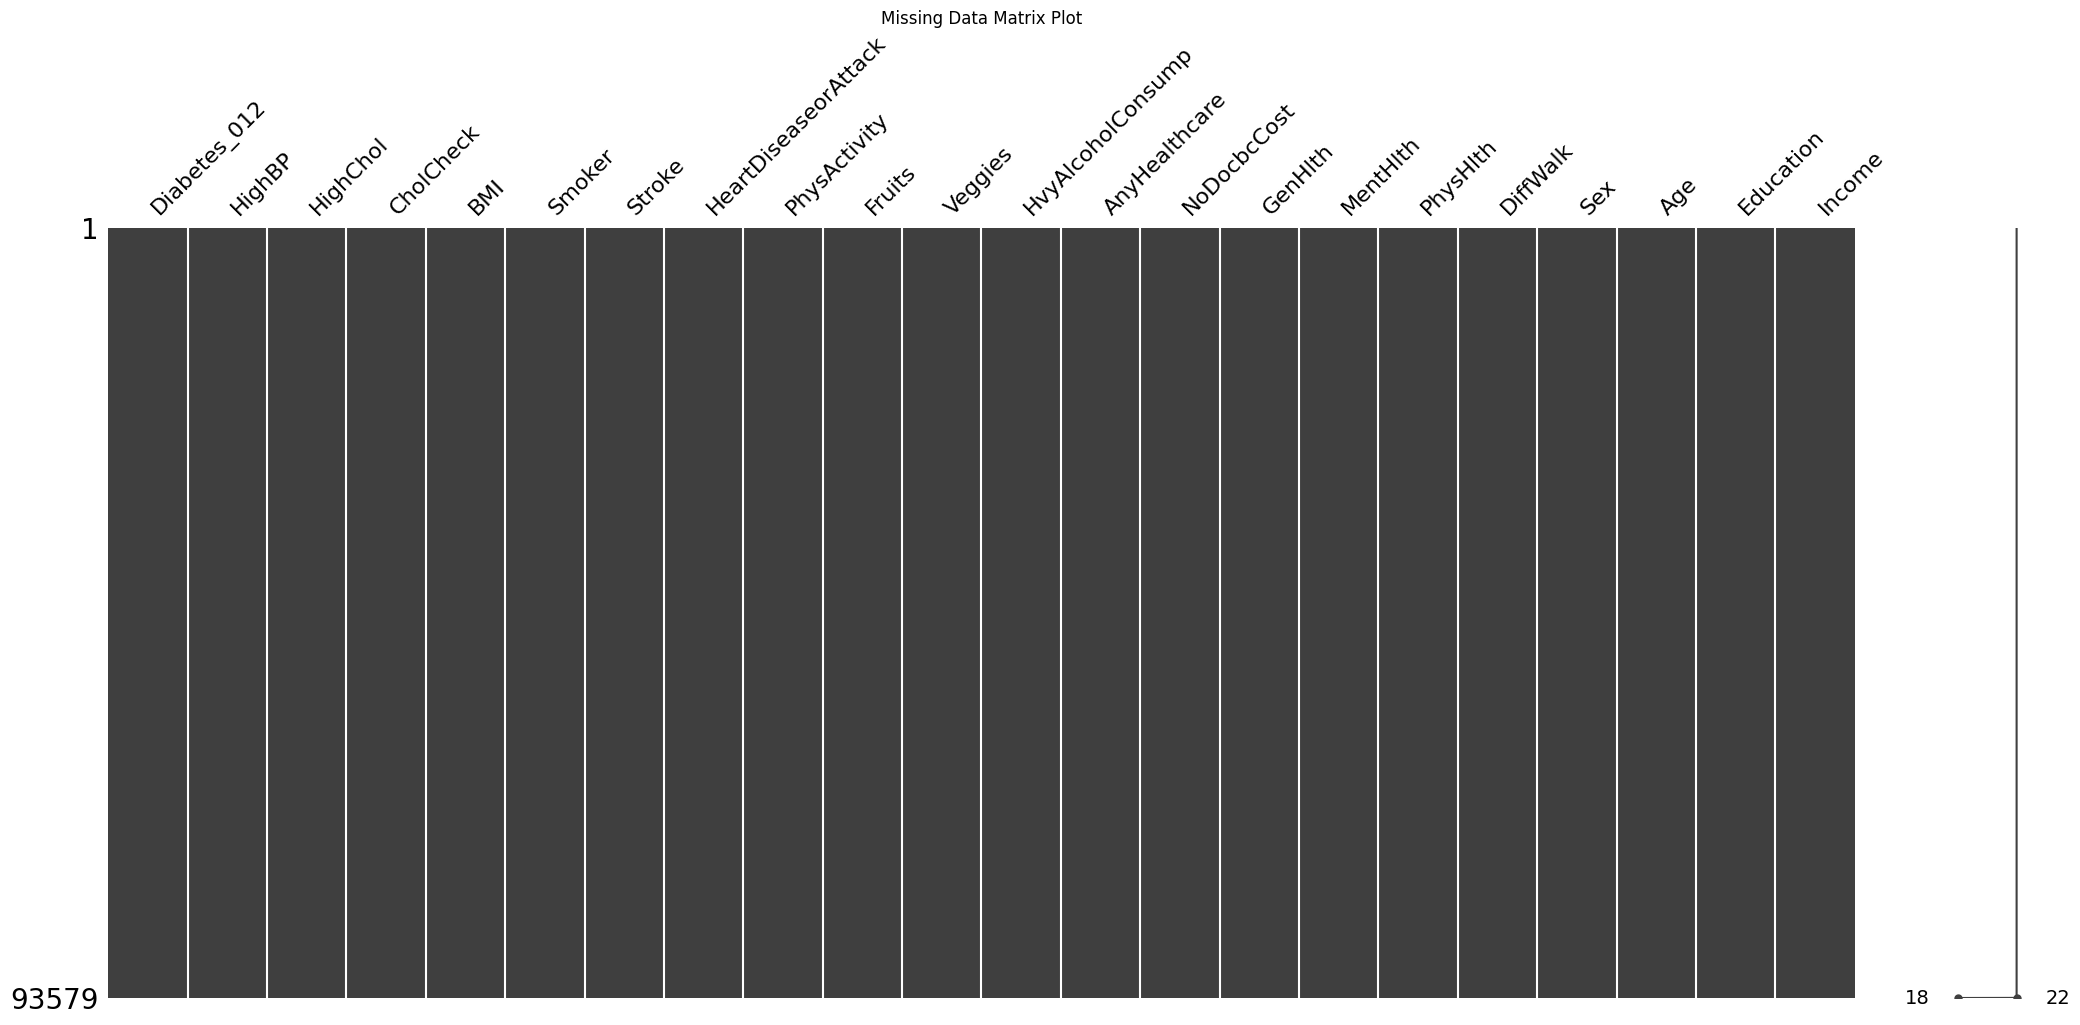

In [6]:
msno.matrix(df)
plt.title('Missing Data Matrix Plot')
plt.show()

In [7]:
df.duplicated().sum()

np.int64(5351)

In [8]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5               0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25              0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29              0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52              2.0     1.0       1.0        1.0  27.0     1.0     0.0   
53              0.0     0.0       0.0        1.0  31.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
93566           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
93572           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
93573           0.0     0.0       0.0        1.0  26.0     1.0     0.0   
93575           0.0     0.0       0.0        1.0  22.0     0.0     0.0   
93576           0.0     0.0       0.0        1.0  27.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
5                       0.0           1.0     1.0  ...            1.0   
25                      0.0           1.0     1.0  ...            1.0   
29                      0.0           1.0     1.0  ...            1.0   
52                      0.0           0.0     0.0  ...            1.0   
53                      0.0           1.0     0.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
93566                   0.0           1.0     1.0  ...            1.0   
93572                   0.0           1.0     1.0  ...            1.0   
93573                   0.0           1.0     0.0  ...            1.0   
93575                   0.0           1.0     0.0  ...            1.0   
93576                   0.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
5              0.0      2.0       0.0       2.0       0.0  1.0  10.0   
25             0.0      2.0       0.0       0.0       0.0  0.0   5.0   
29             0.0      1.0       0.0       0.0       0.0  1.0  12.0   
52             0.0      5.0       0.0      30.0       1.0  0.0  10.0   
53             0.0      2.0       0.0       0.0       0.0  0.0  10.0   
...            ...      ...       ...       ...       ...  ...   ...   
93566          0.0      1.0       0.0       0.0       0.0  1.0   8.0   
93572          0.0      2.0       0.0       0.0       0.0  1.0   5.0   
93573          0.0      2.0       0.0       0.0       0.0  1.0   7.0   
93575          0.0      1.0       0.0       0.0       0.0  1.0   5.0   
93576          0.0      1.0       0.0       0.0       0.0  0.0   4.0   

       Education  Income  
5            6.0     8.0  
25           6.0     8.0  
29           6.0     8.0  
52           4.0     5.0  
53           5.0     6.0  
...          ...     ...  
93566        6.0     8.0  
93572        4.0     8.0  
93573        4.0     6.0  
93575        6.0     8.0  
93576        6.0     8.0  

[8341 rows x 22 columns]

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [12]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    73456
2.0    12996
1.0     1776
Name: count, dtype: int64

In [13]:
x=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']

In [14]:
y[y == 2] = 1

y.value_counts()

Diabetes_012
0.0    73456
1.0    14772
Name: count, dtype: int64

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88228 entries, 0 to 93578
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                88228 non-null  float64
 1   HighChol              88228 non-null  float64
 2   CholCheck             88228 non-null  float64
 3   BMI                   88228 non-null  float64
 4   Smoker                88228 non-null  float64
 5   Stroke                88228 non-null  float64
 6   HeartDiseaseorAttack  88228 non-null  float64
 7   PhysActivity          88228 non-null  float64
 8   Fruits                88228 non-null  float64
 9   Veggies               88228 non-null  float64
 10  HvyAlcoholConsump     88228 non-null  float64
 11  AnyHealthcare         88228 non-null  float64
 12  NoDocbcCost           88228 non-null  float64
 13  GenHlth               88228 non-null  float64
 14  MentHlth              88228 non-null  float64
 15  PhysHlth              88

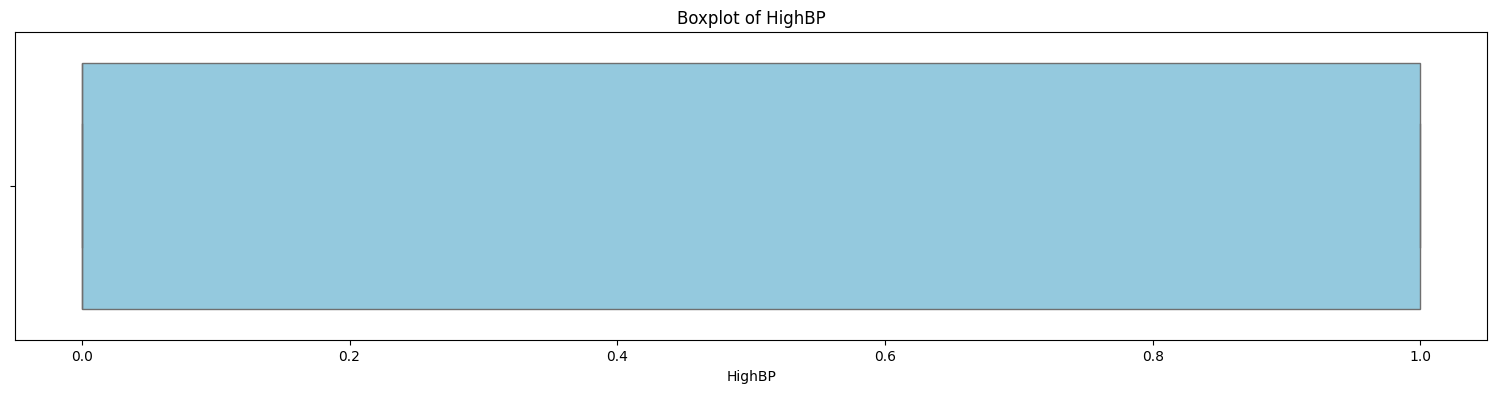

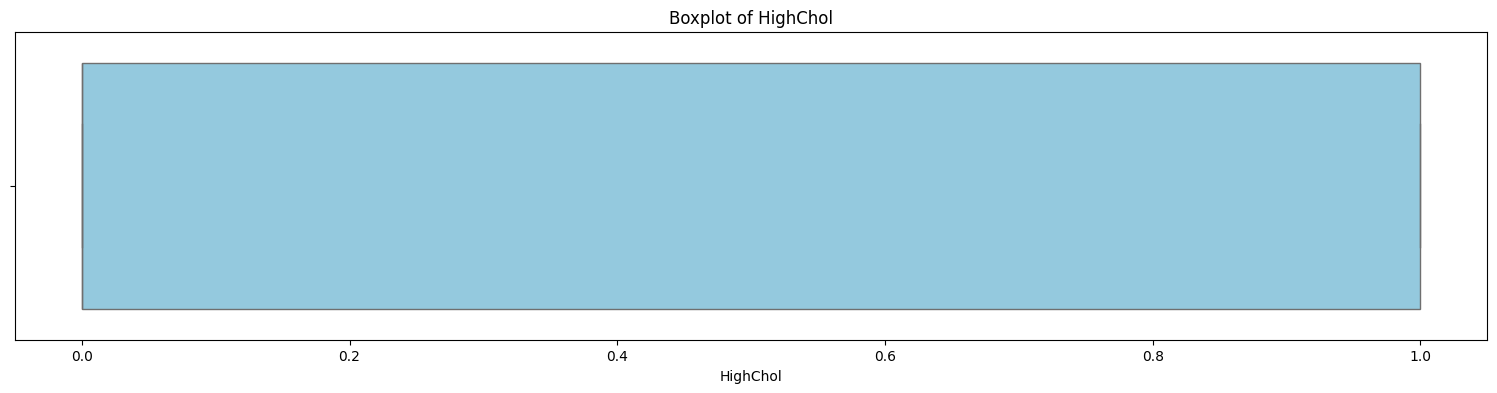

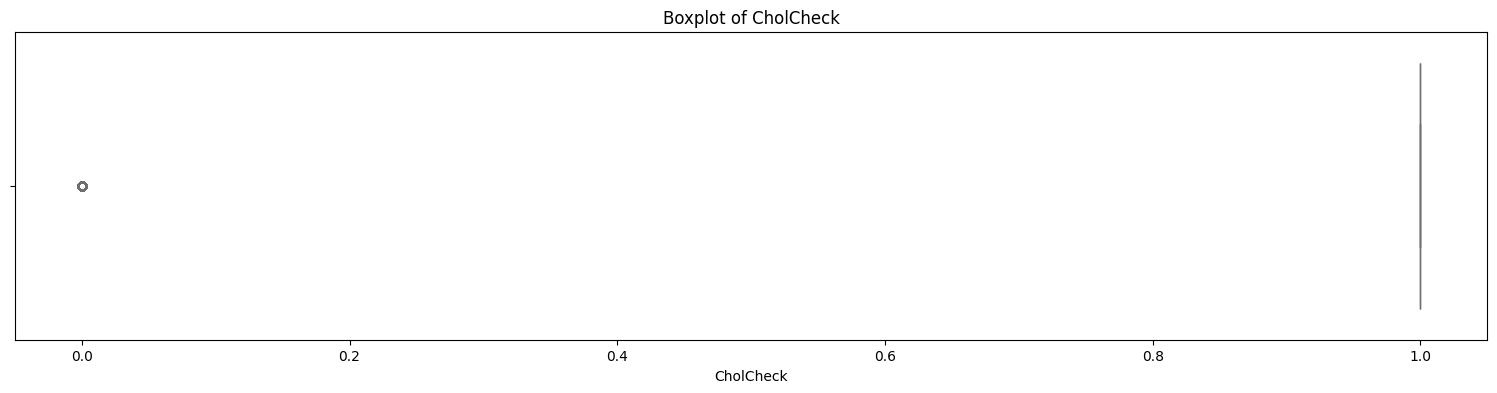

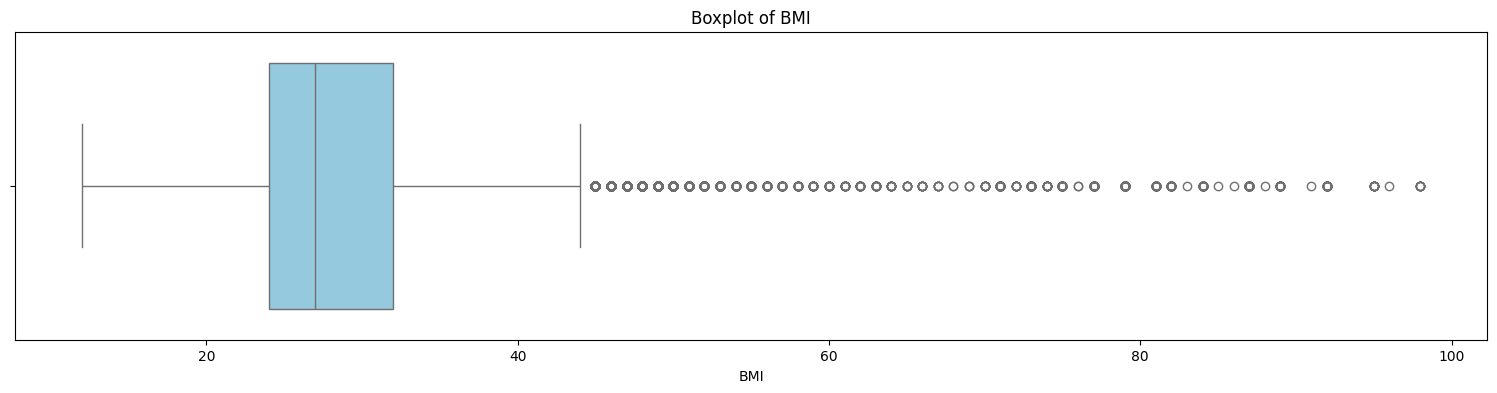

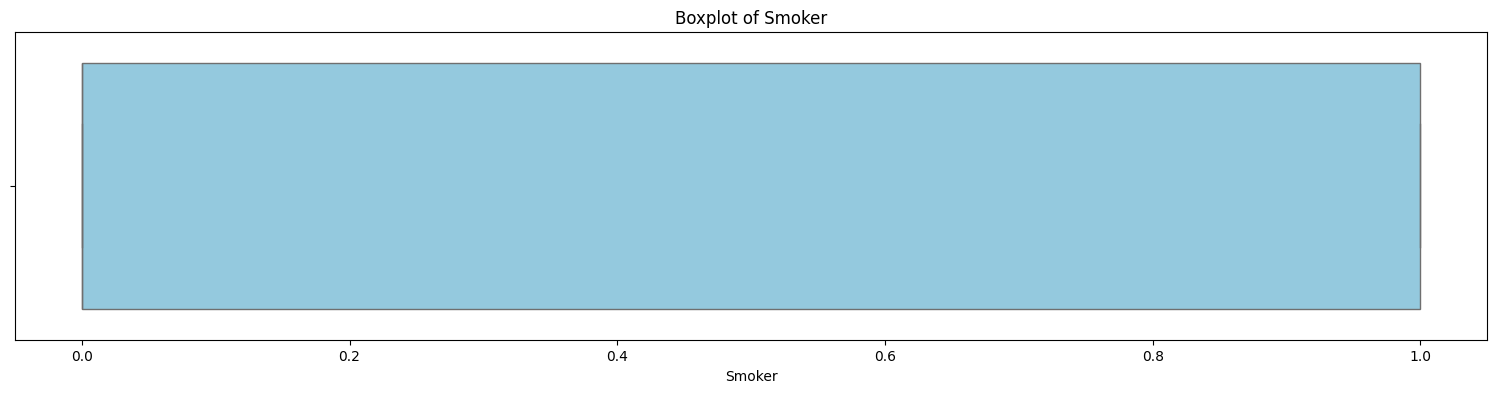

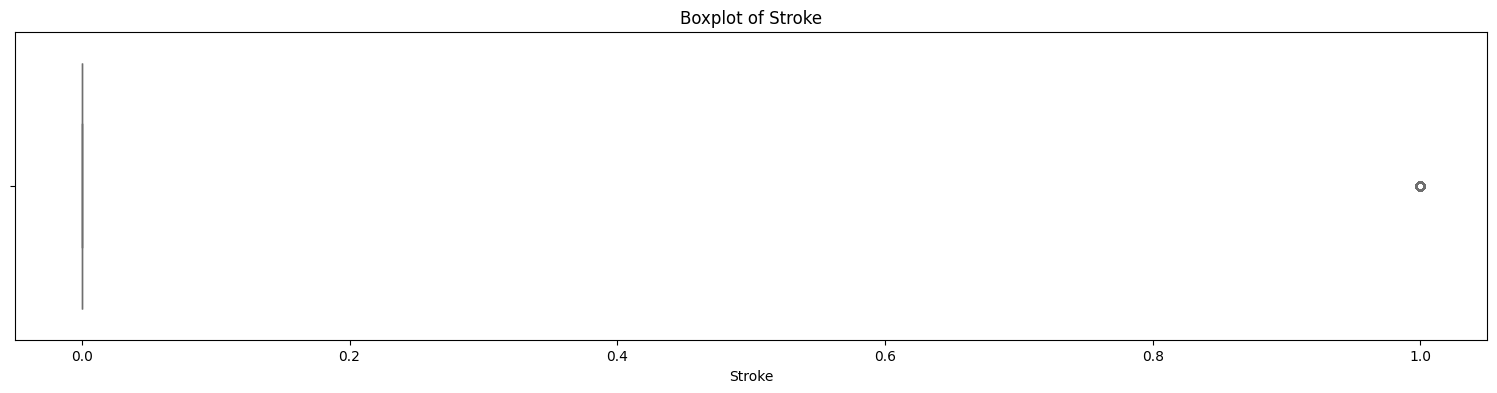

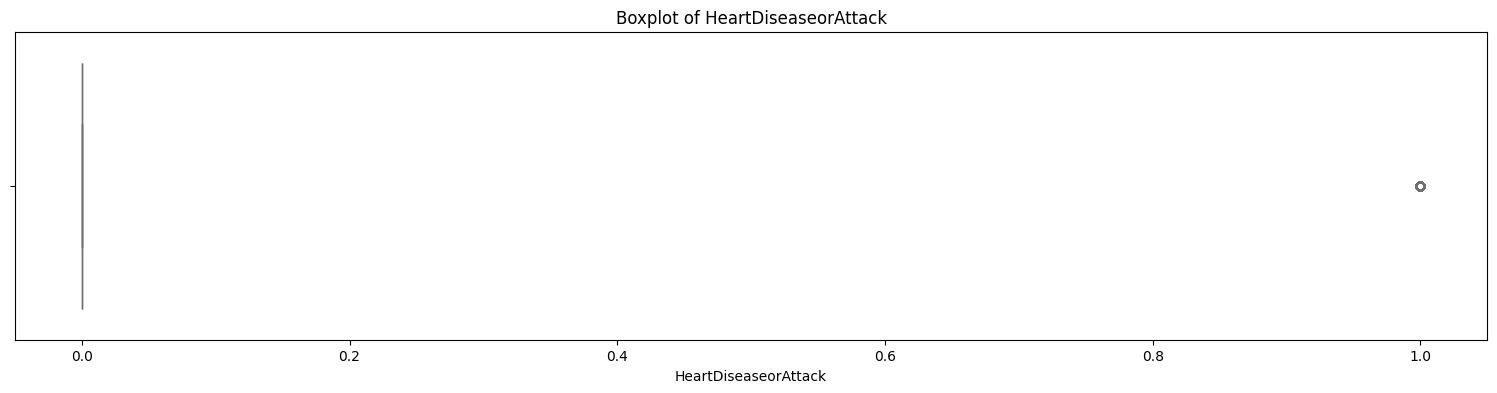

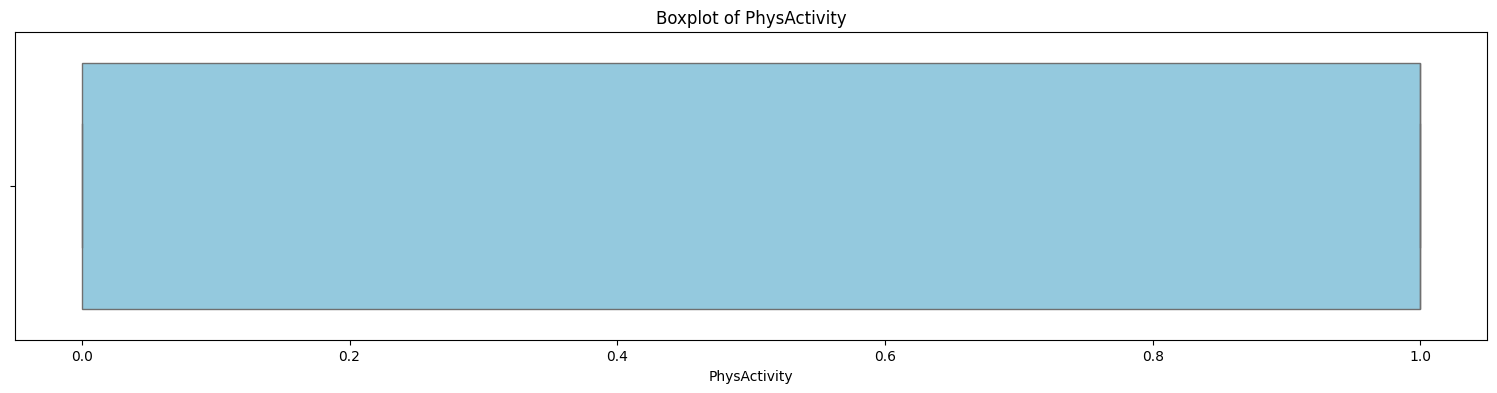

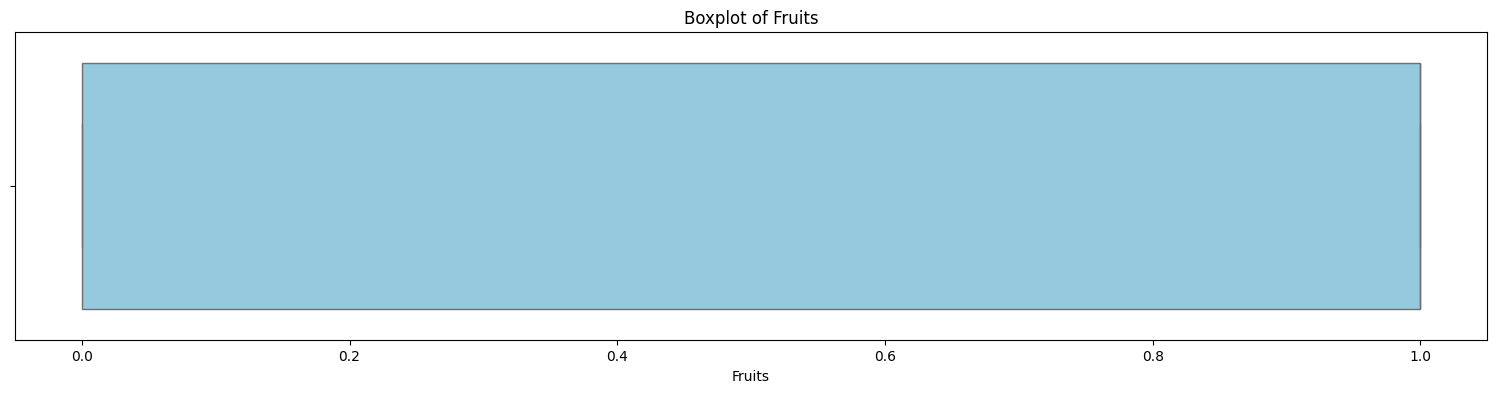

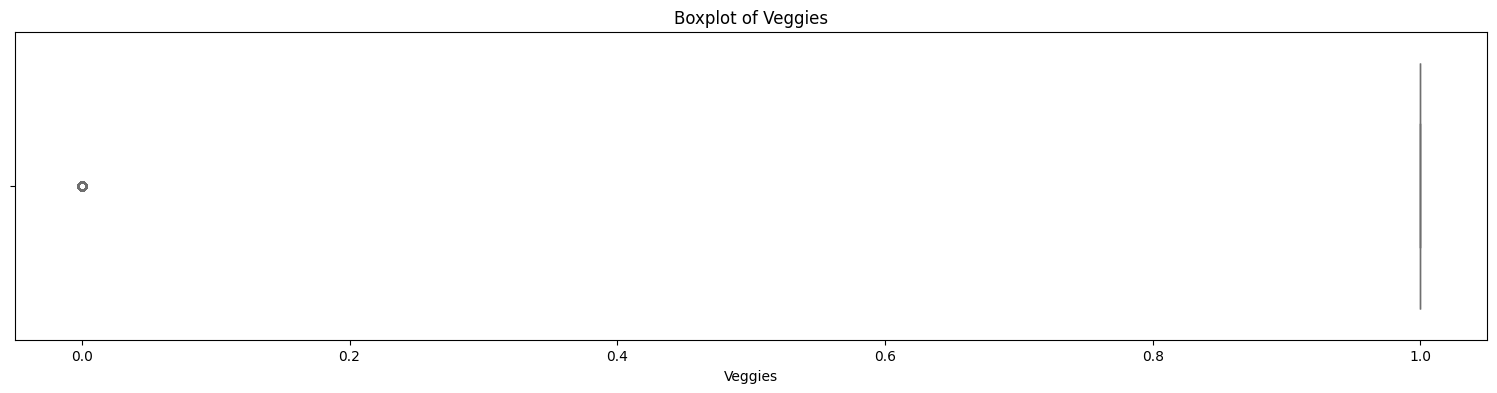

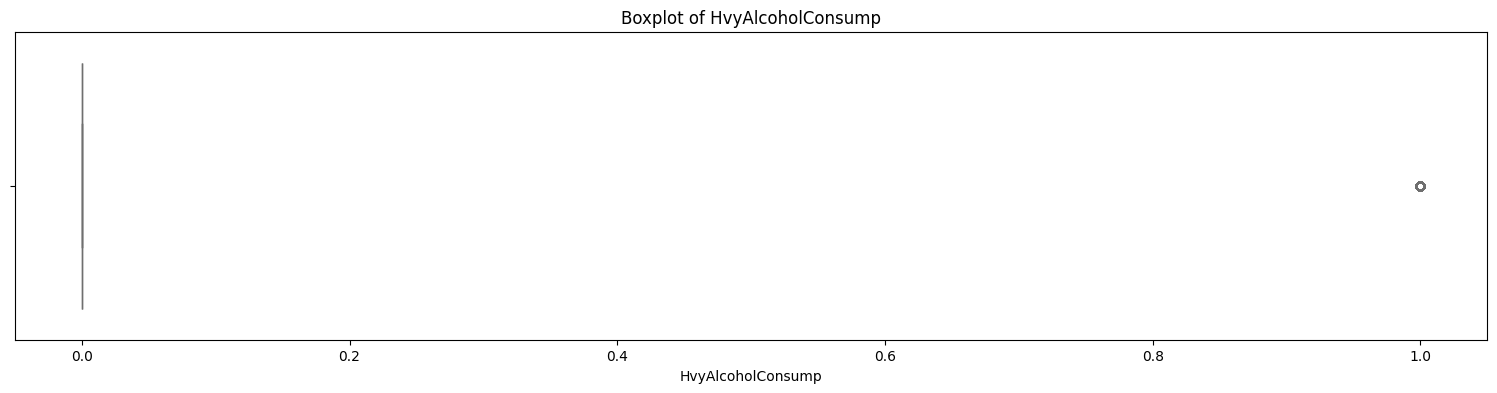

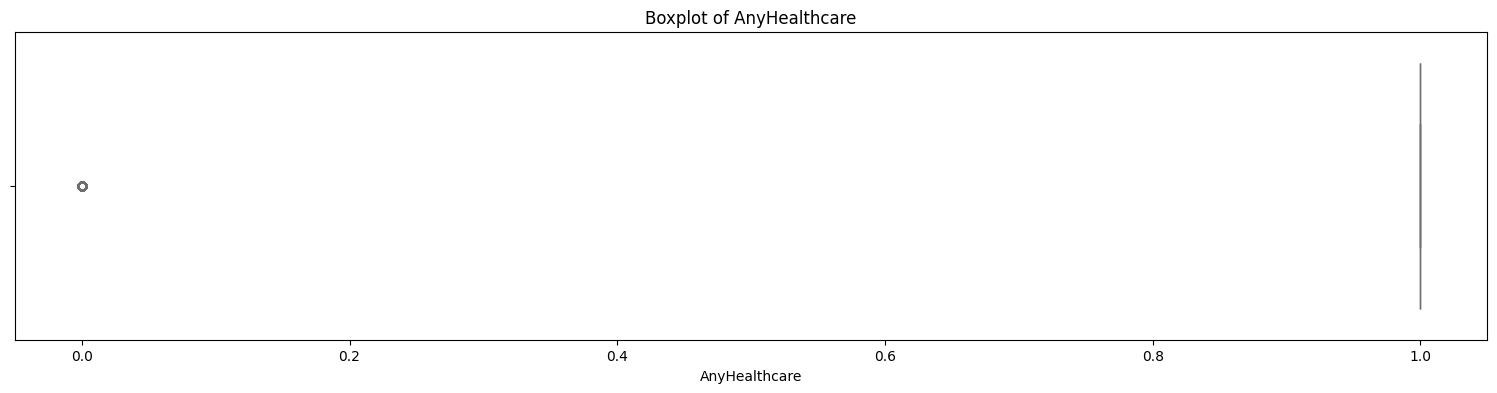

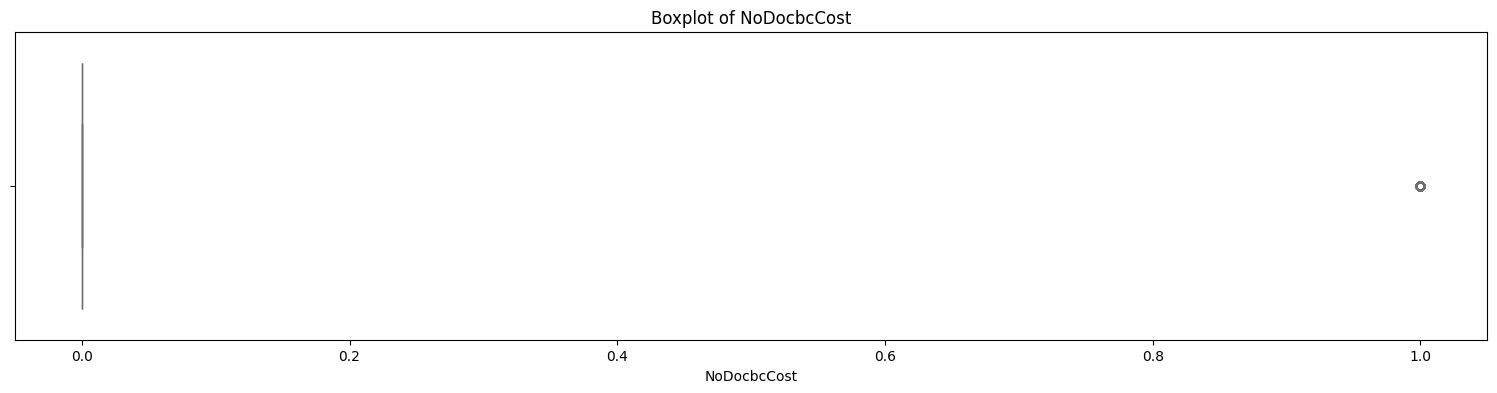

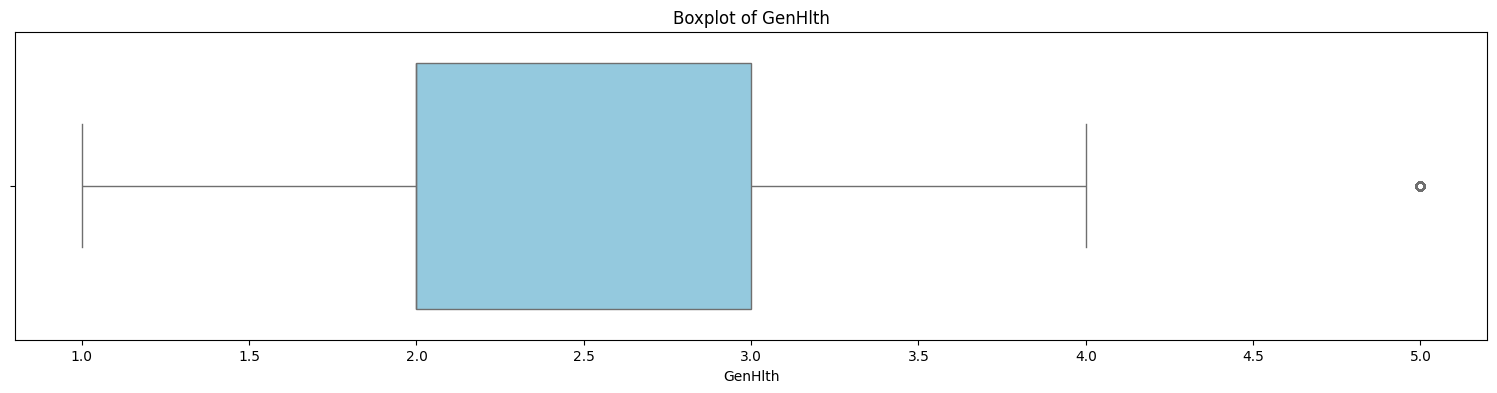

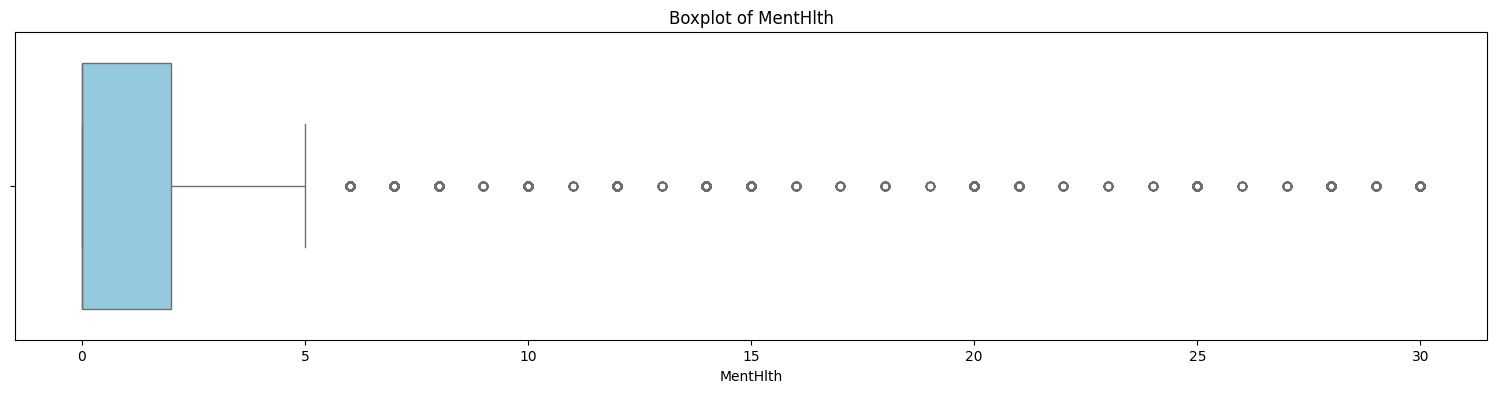

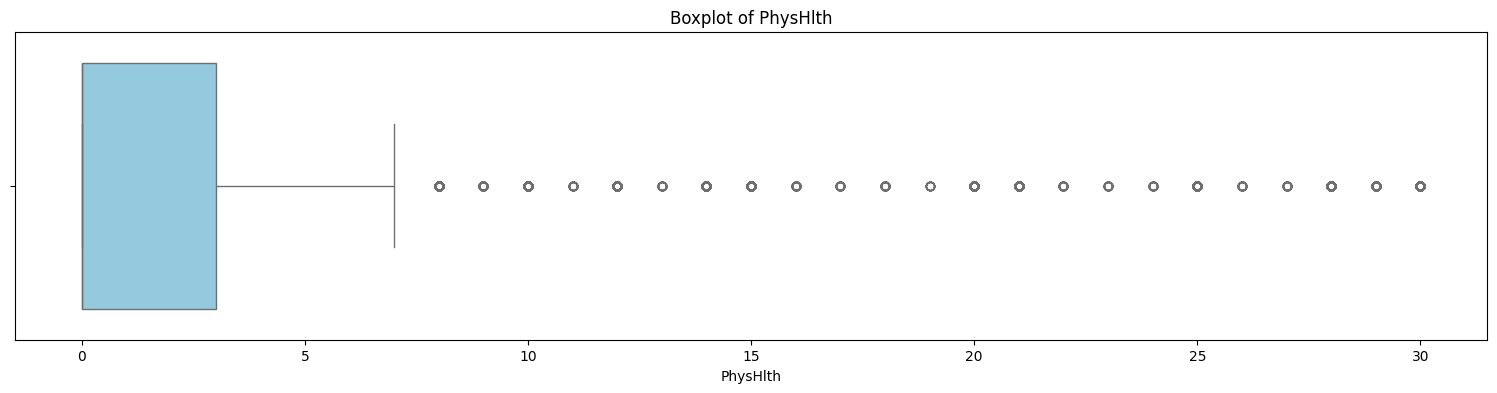

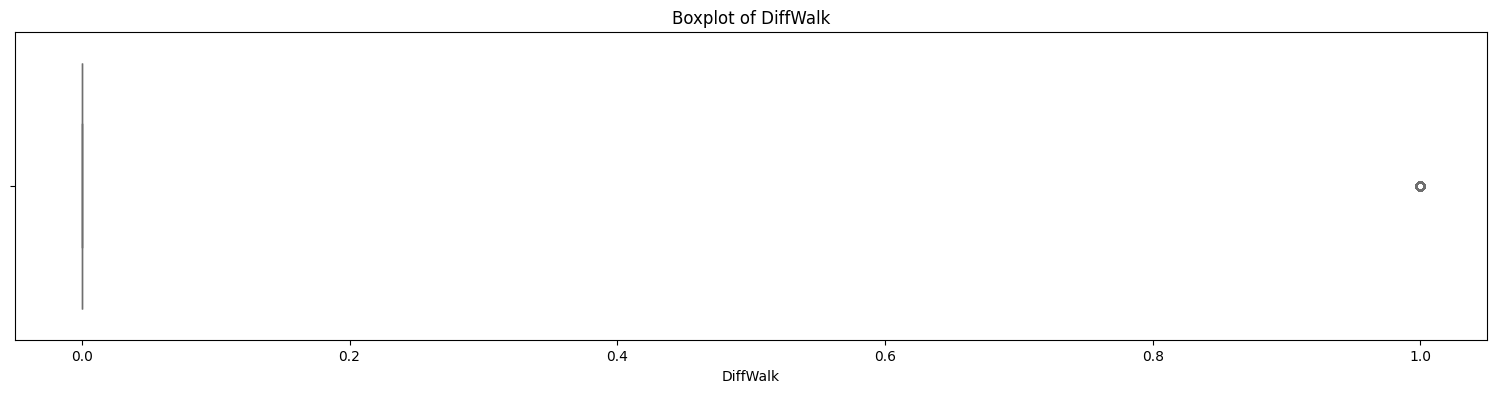

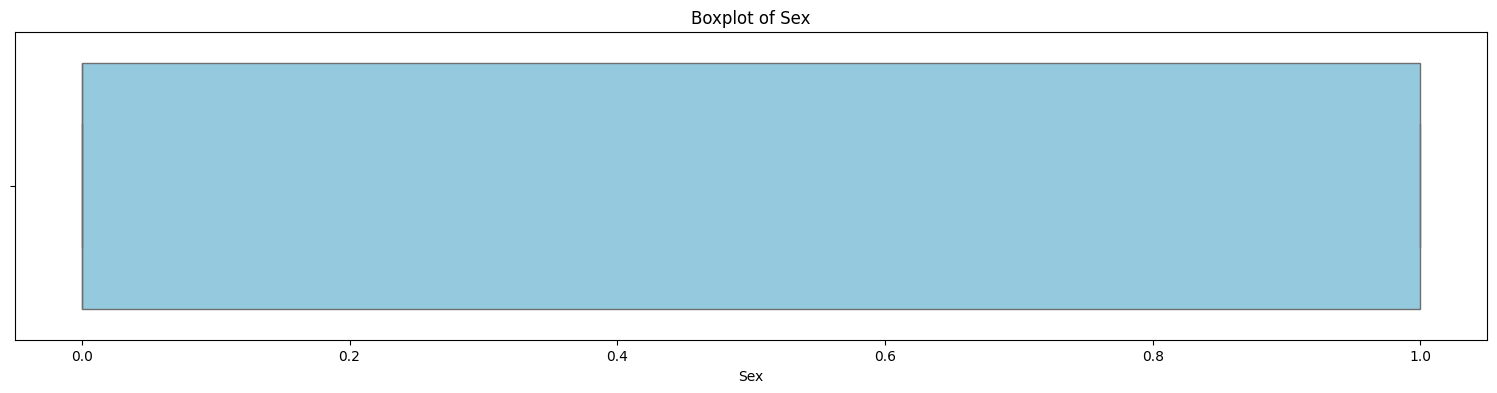

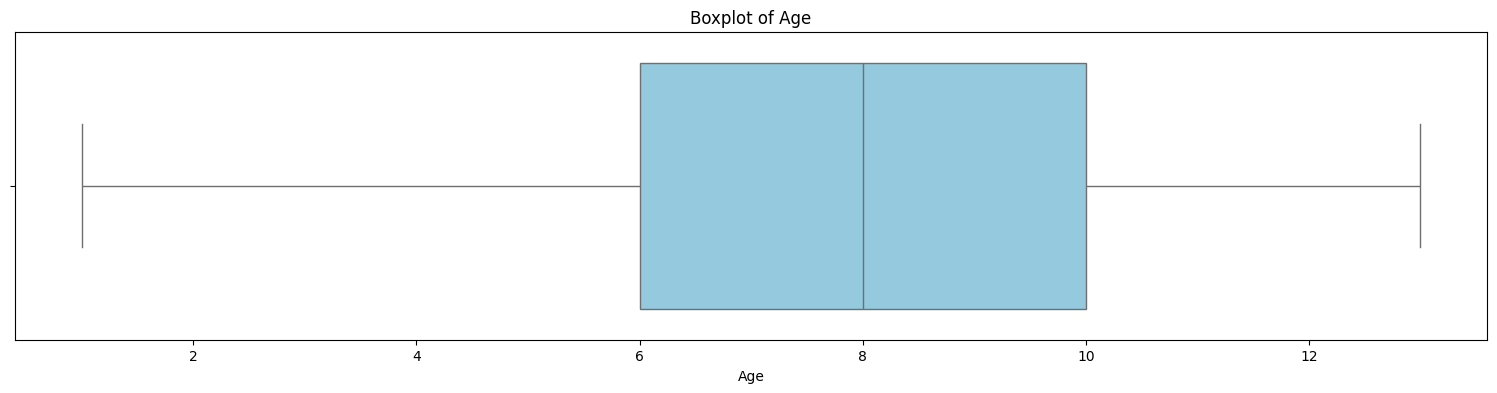

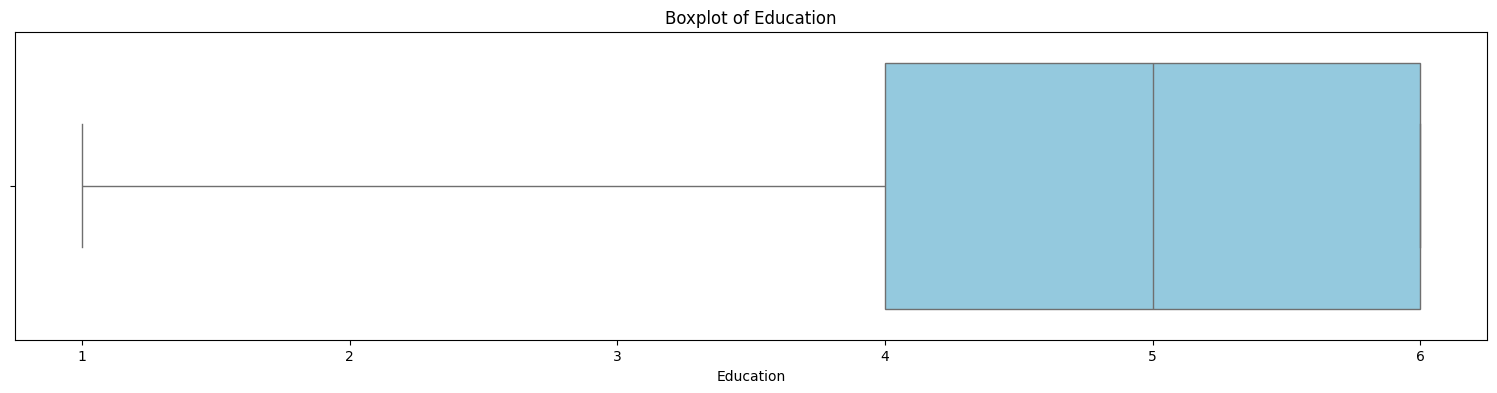

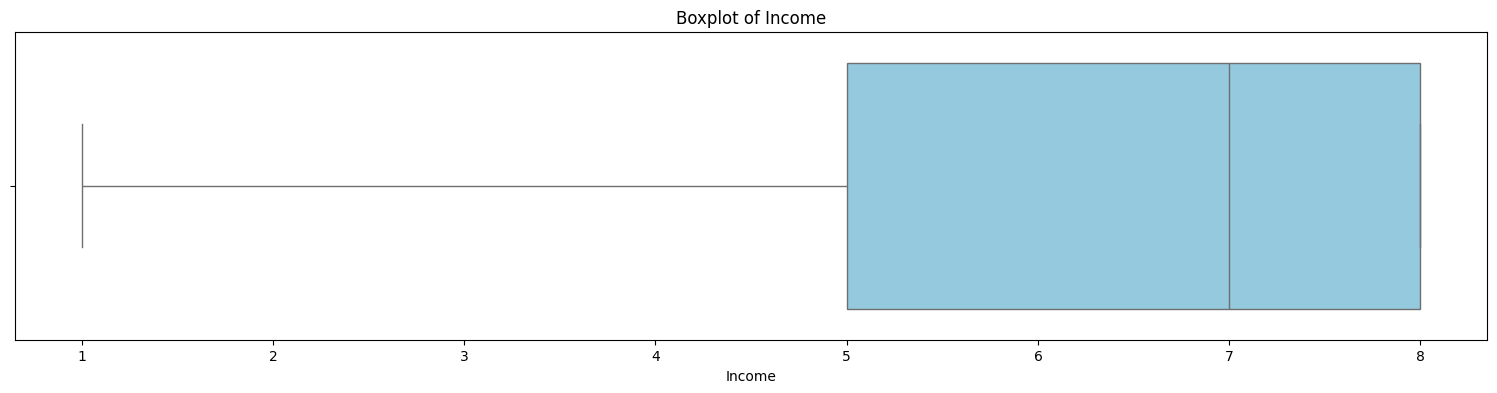

In [16]:
for feature in x.columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


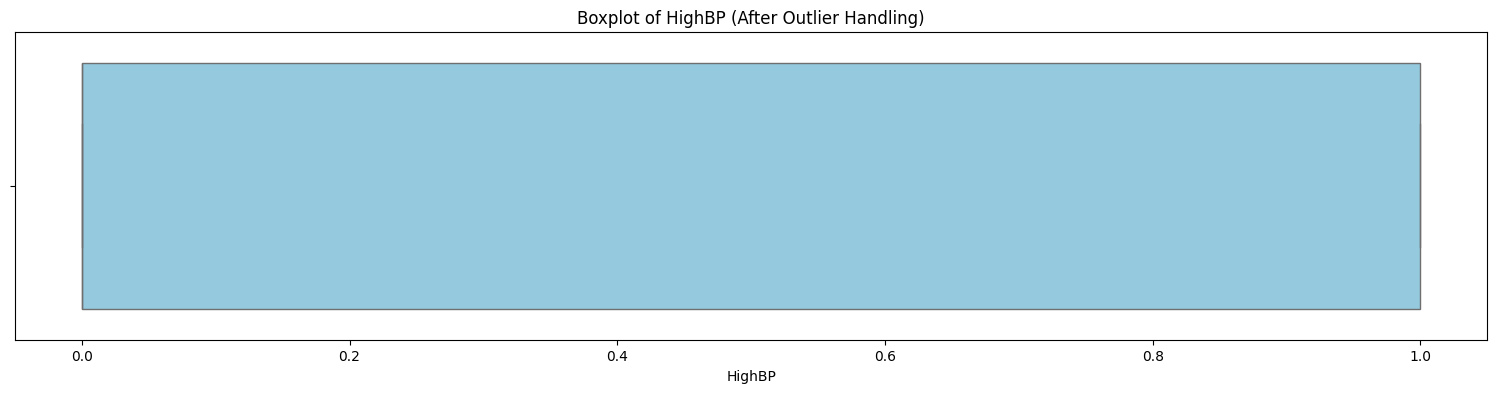

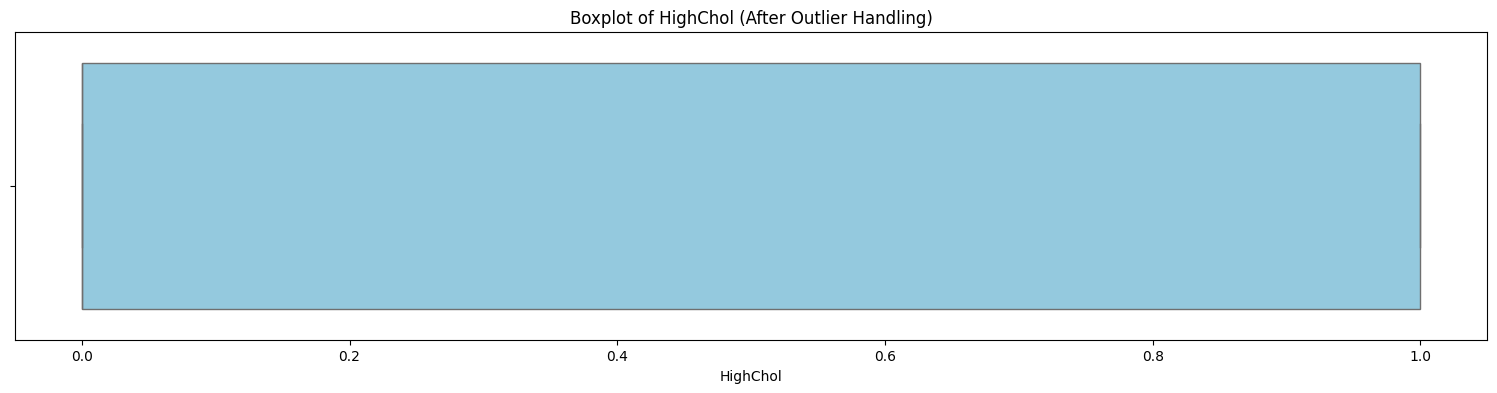

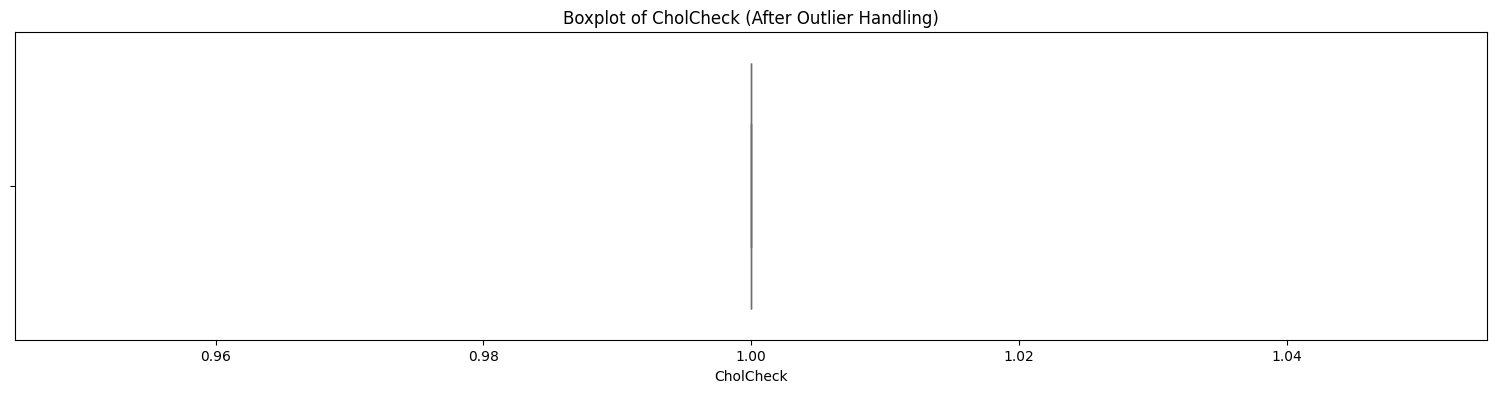

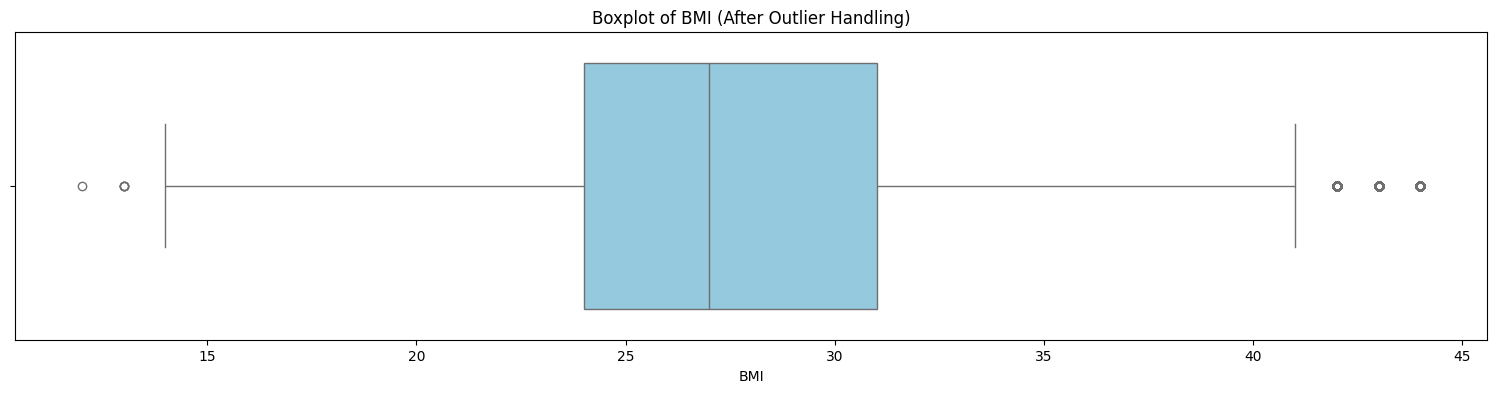

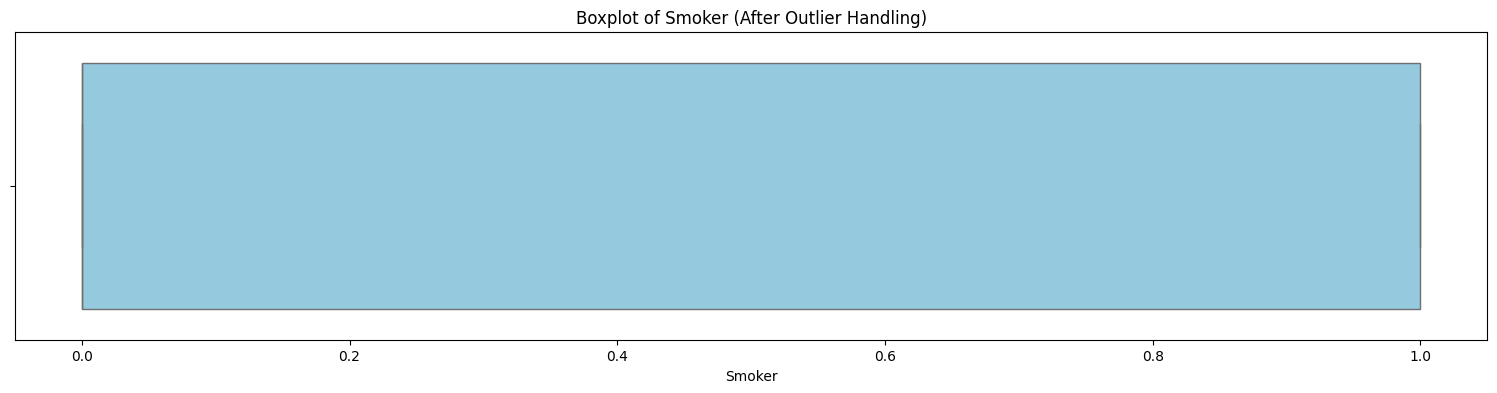

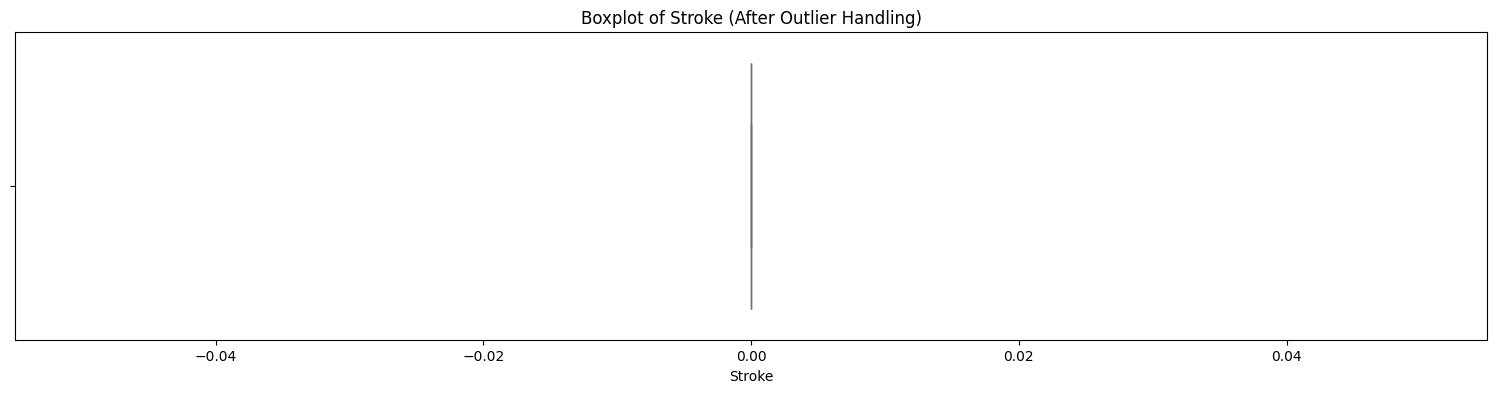

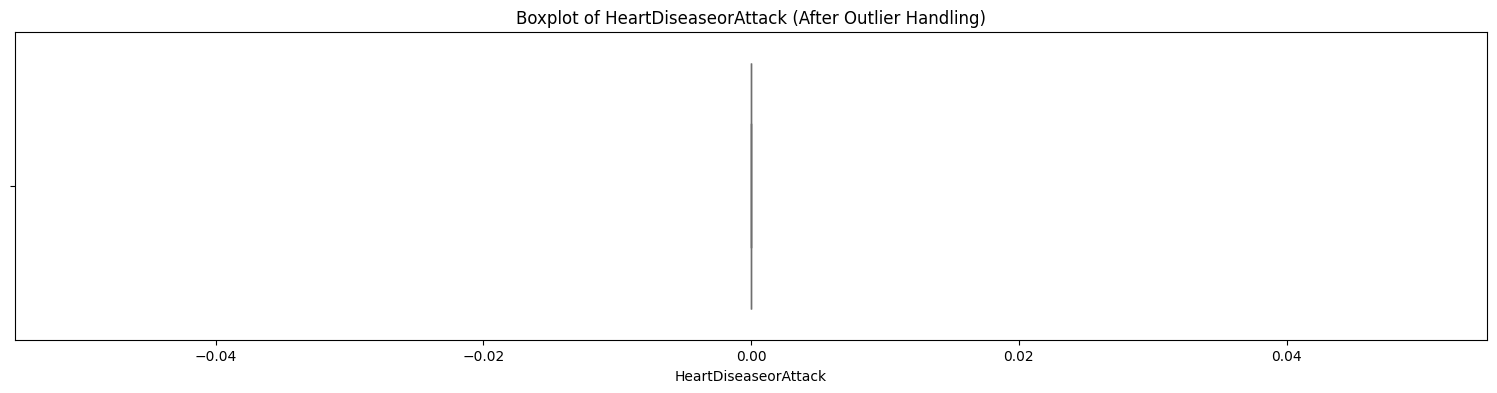

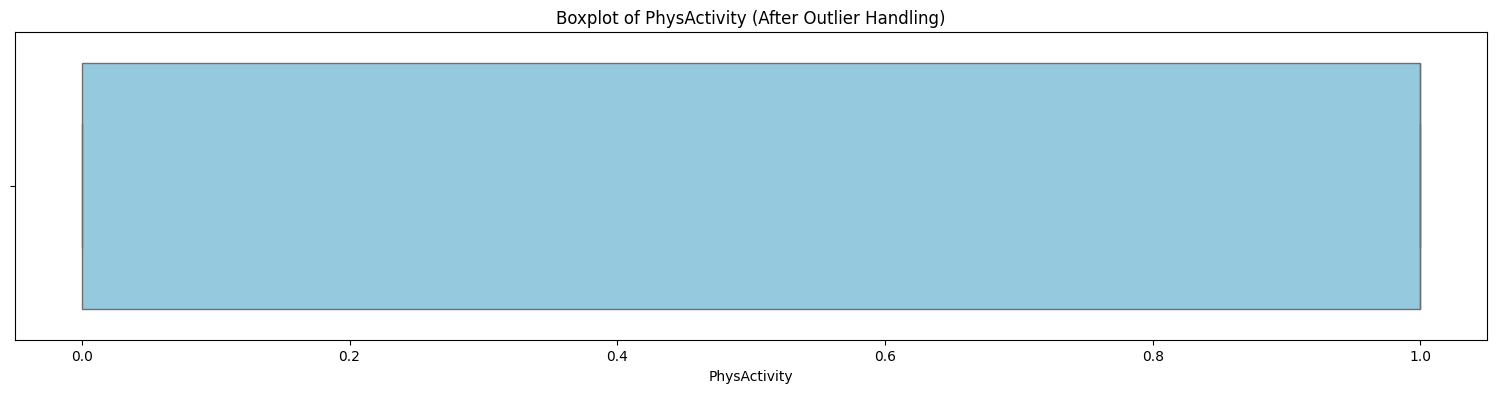

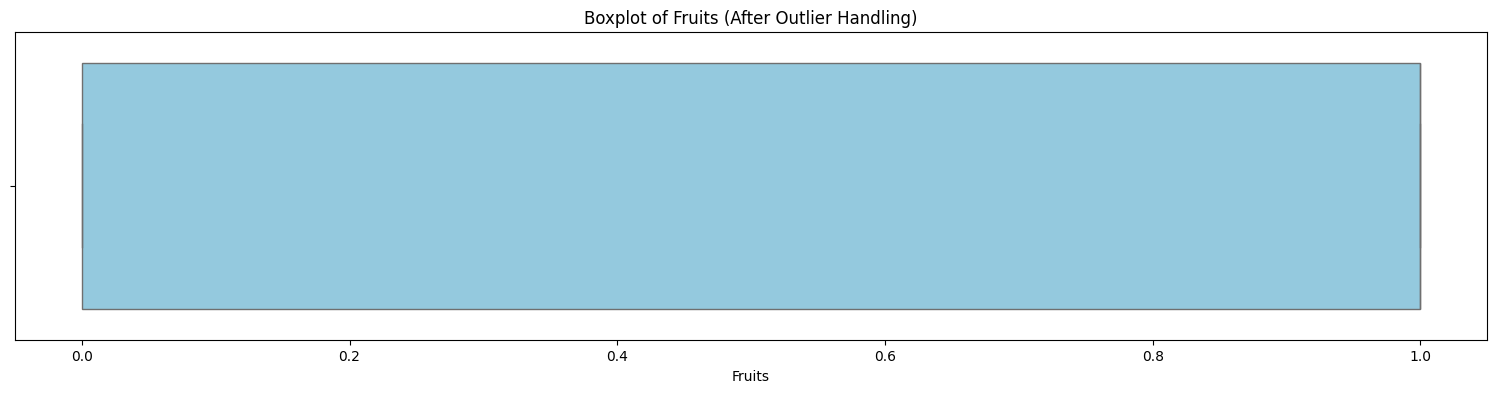

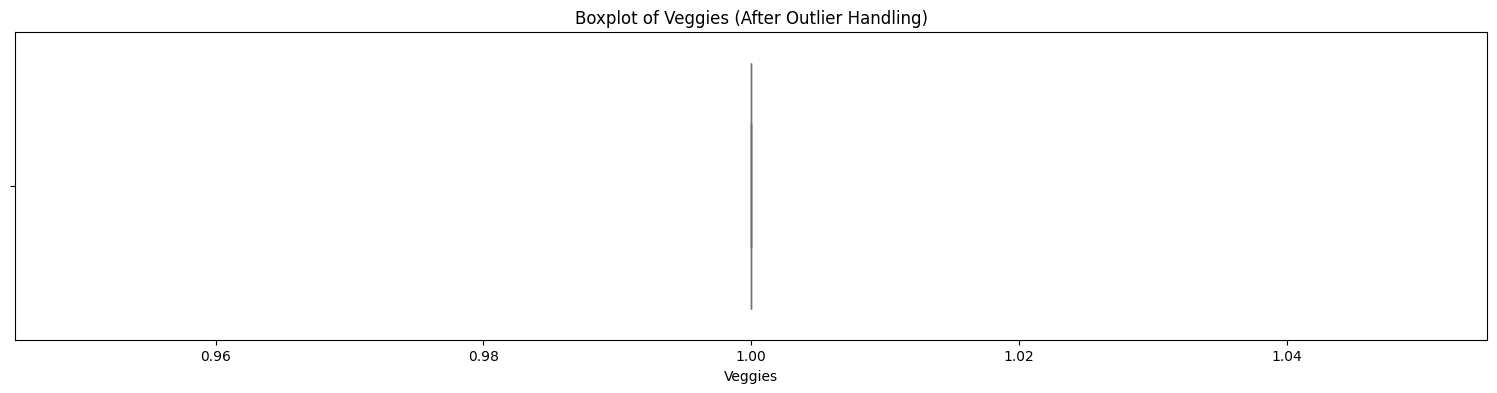

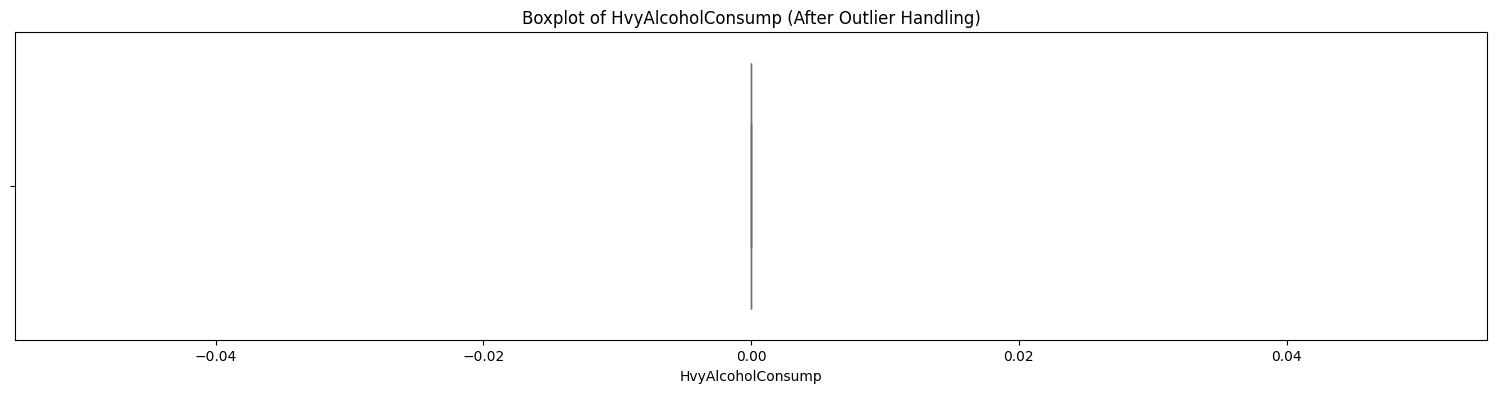

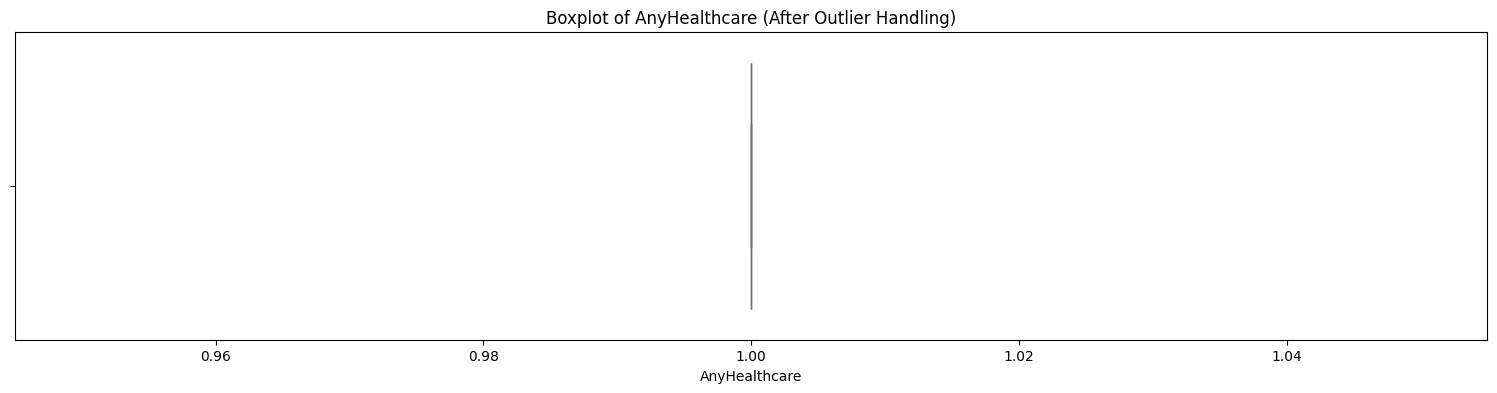

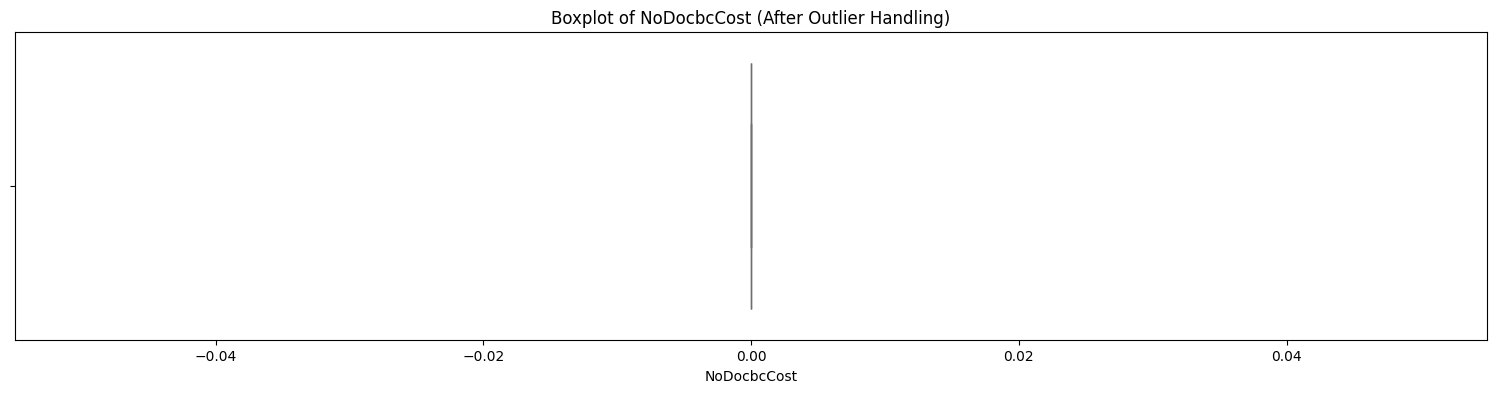

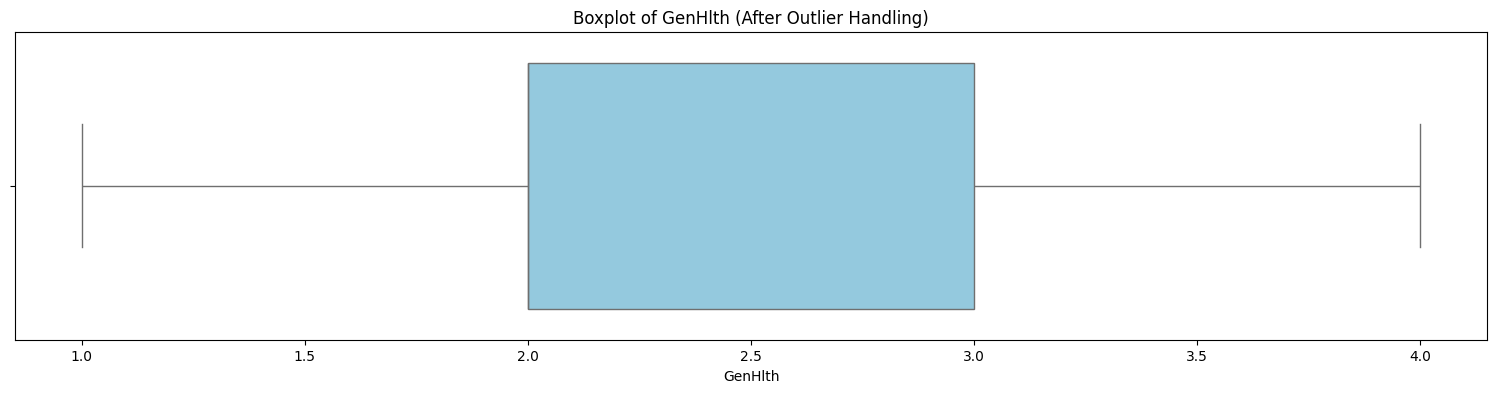

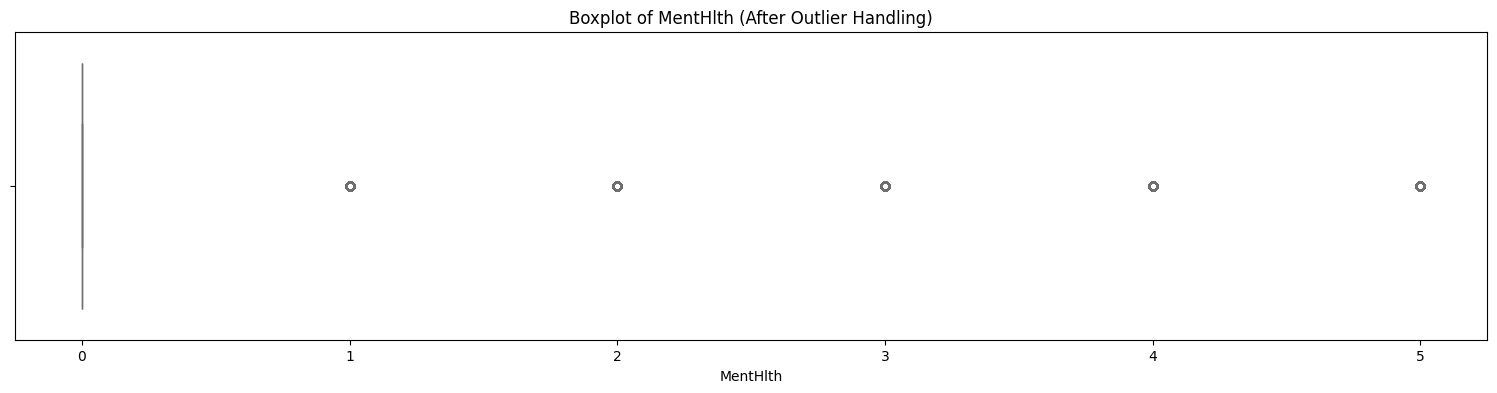

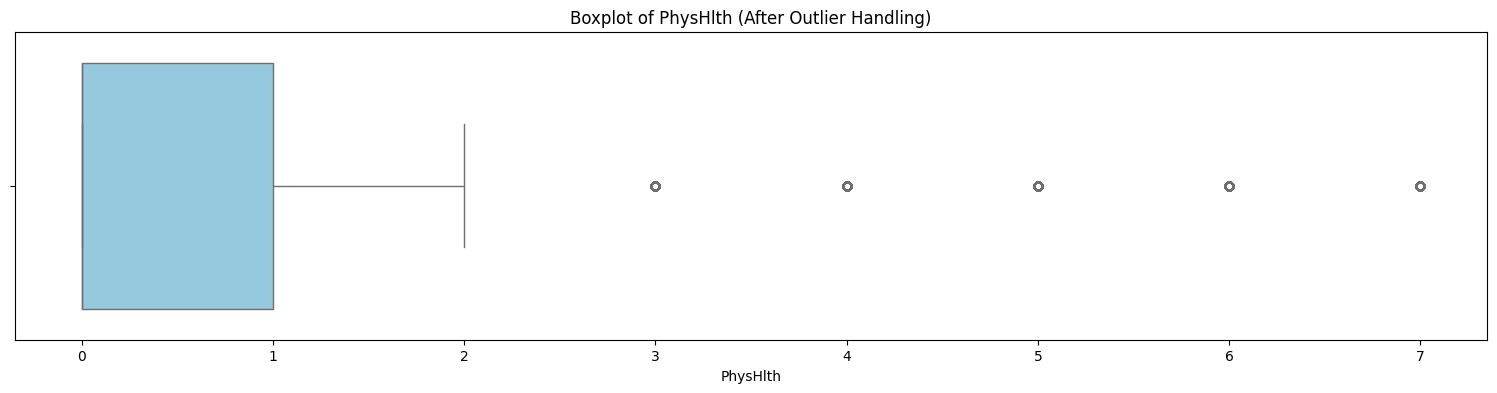

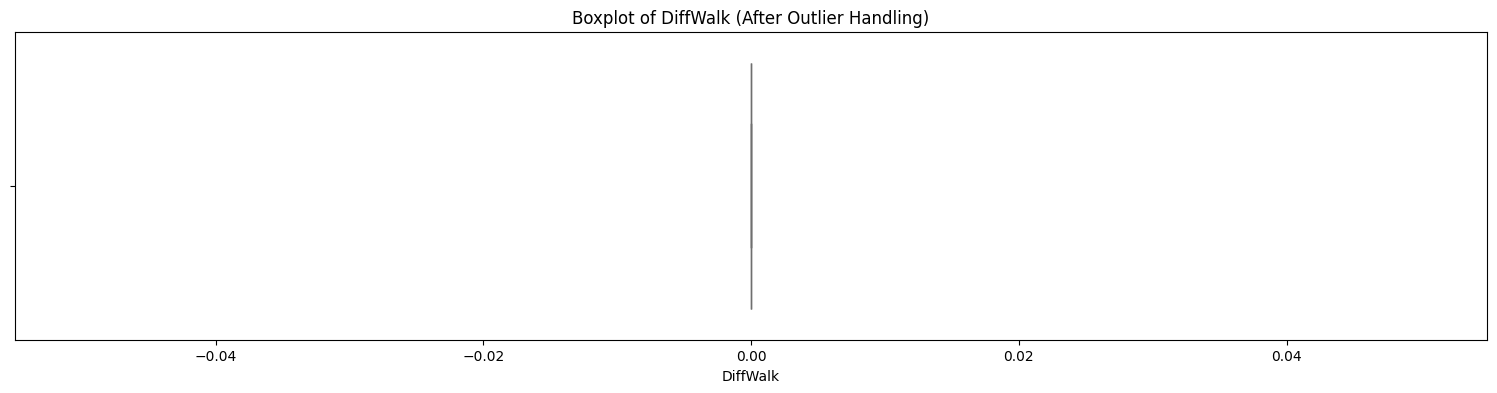

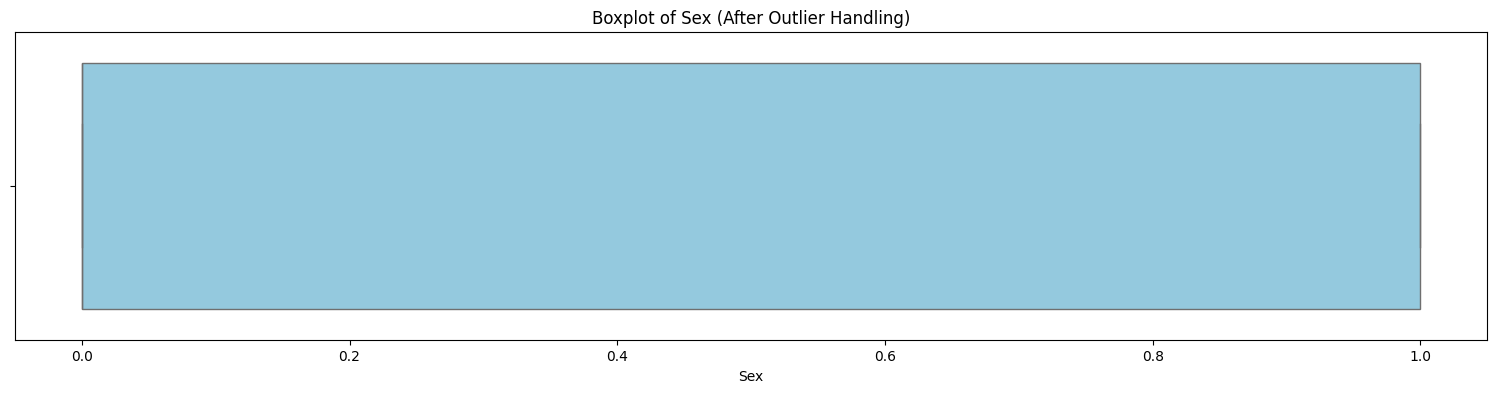

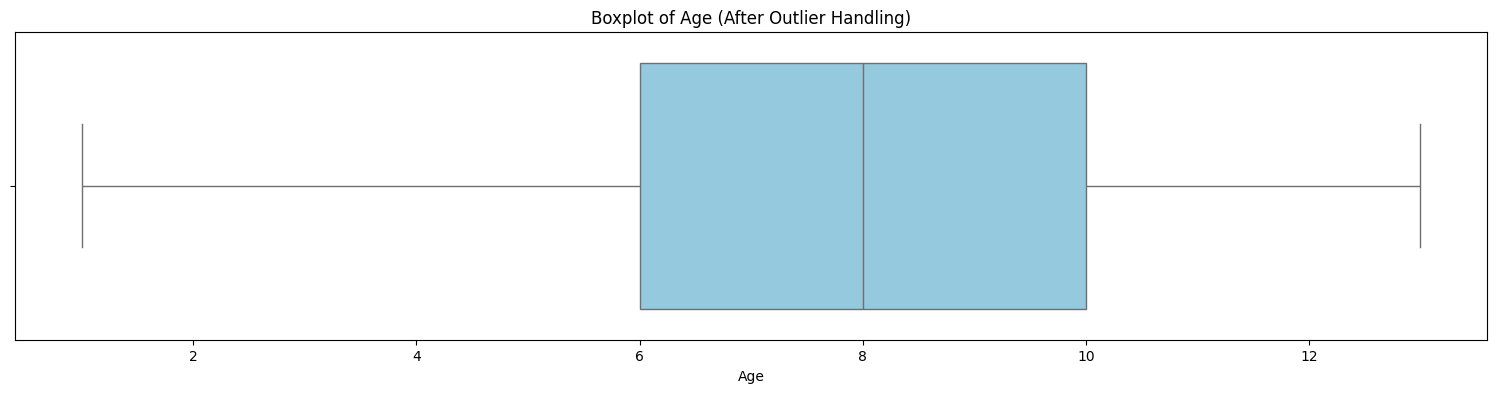

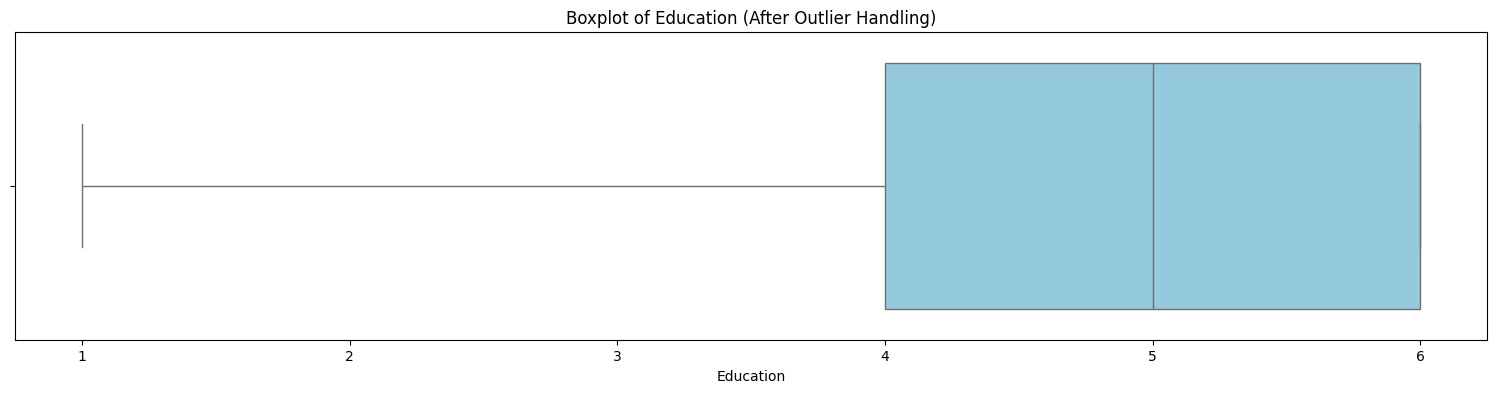

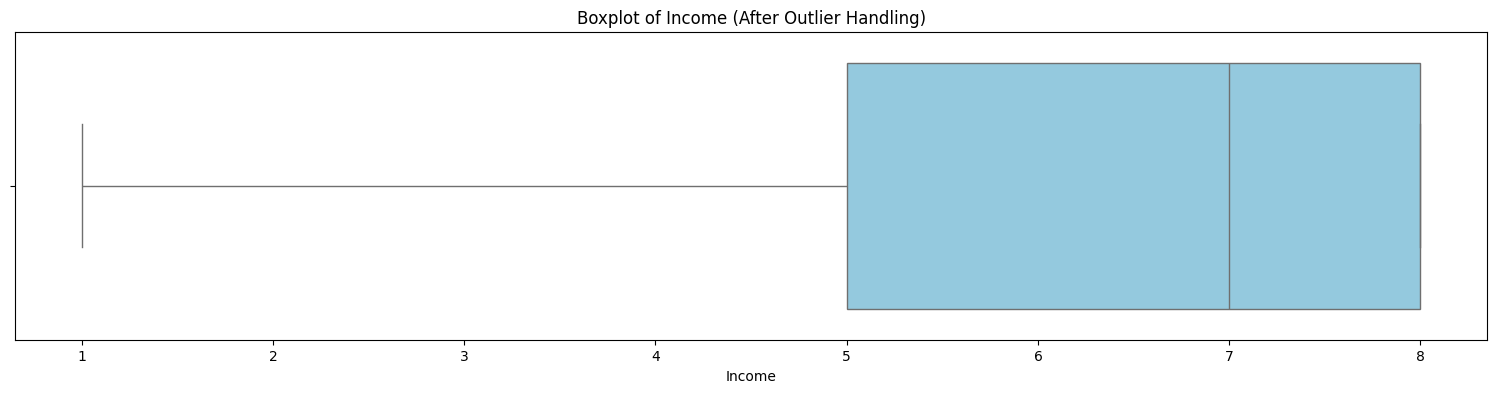

In [17]:
def handle_outliers(x, col, method='iqr', threshold=1.5):

    if method == 'iqr':
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        x = x[(x[col] >= lower_bound) & (x[col] <= upper_bound)]
    elif method == 'zscore':
        from scipy import stats
        z = np.abs(stats.zscore(x[col]))
        x = x[(z < threshold)]
    else:
        raise ValueError("Invalid outlier handling method. Choose 'iqr' or 'zscore'.")

    return x[col]

for col in x.columns:
    x[col] = handle_outliers(x, col, method='iqr')
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[col], color='skyblue')
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.show()


#EDA

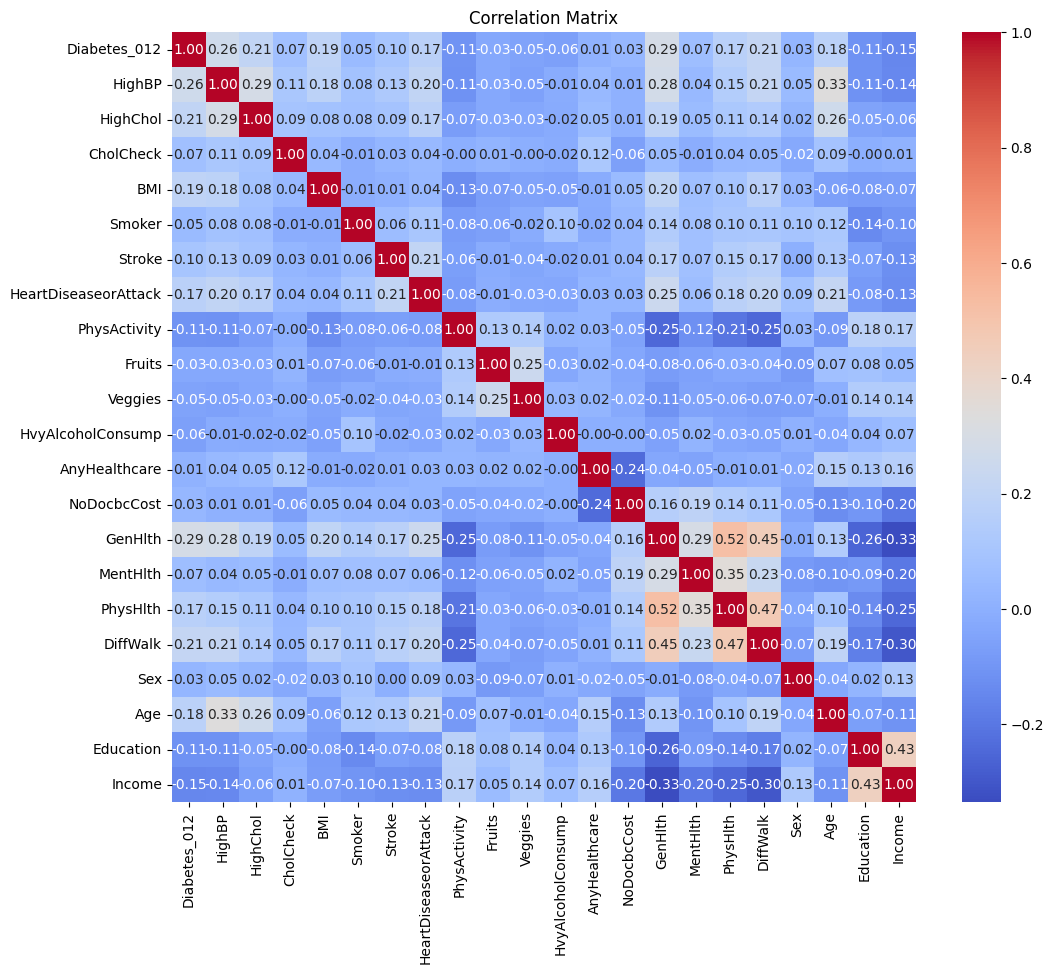

In [18]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

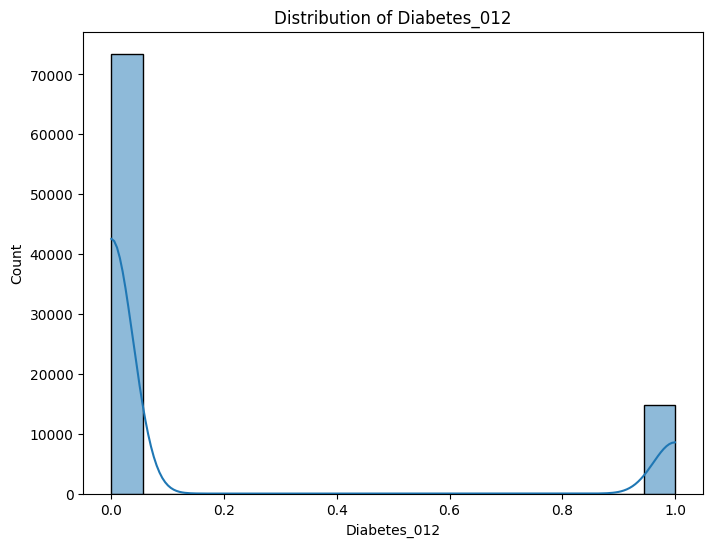

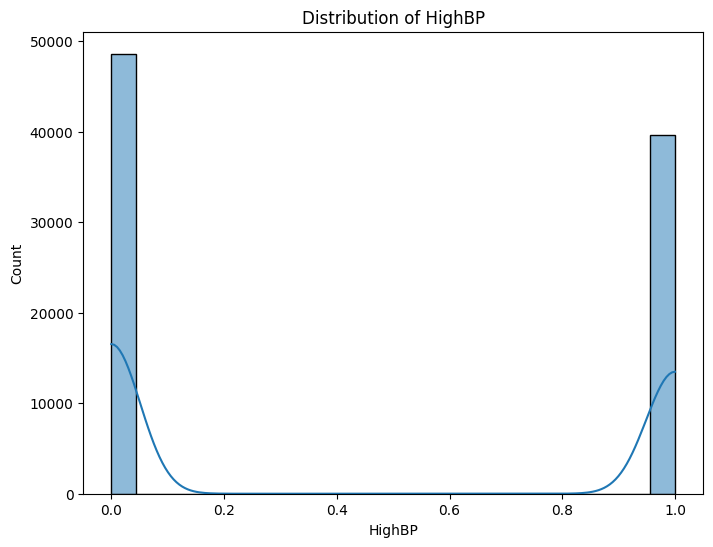

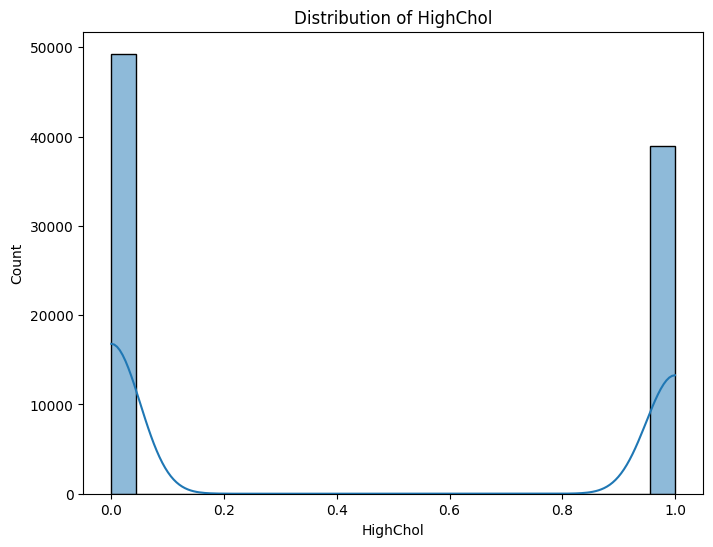

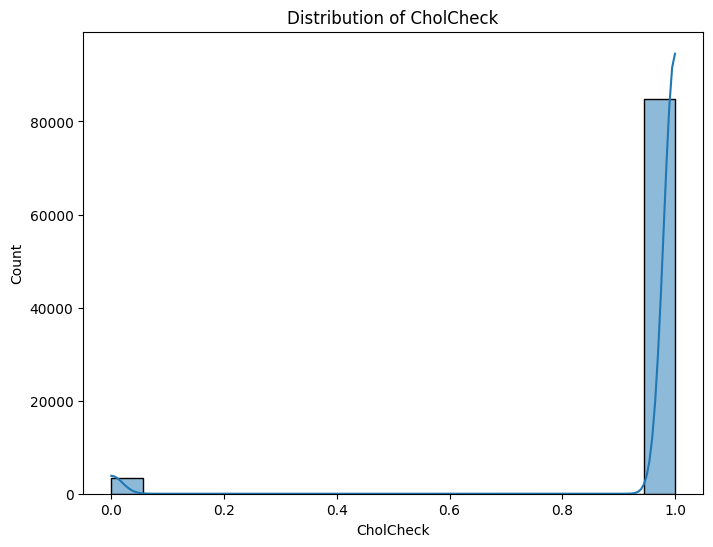

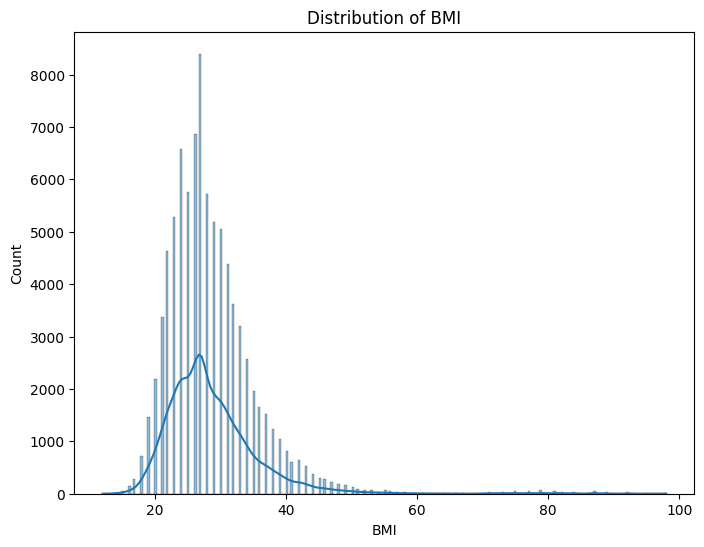

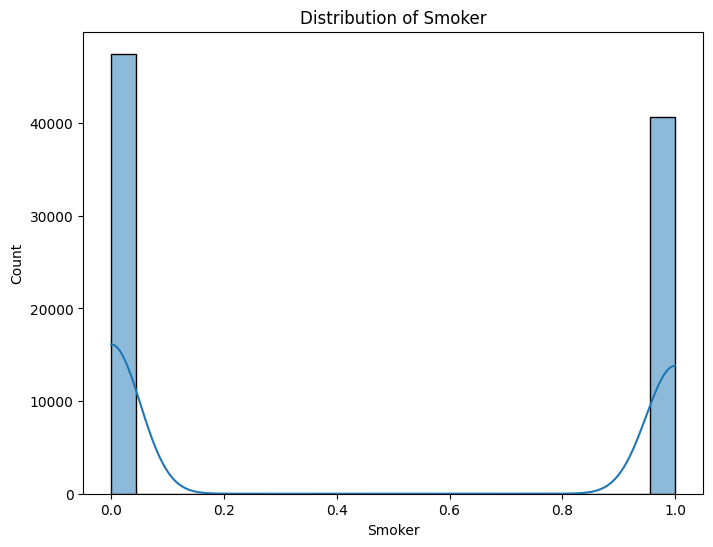

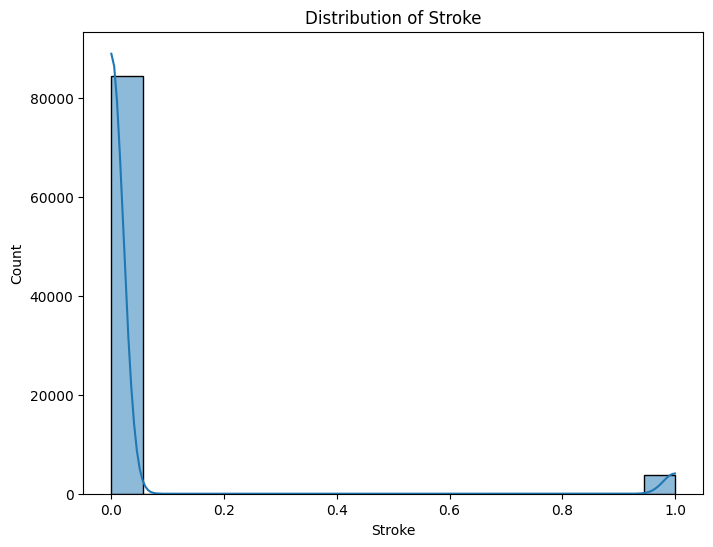

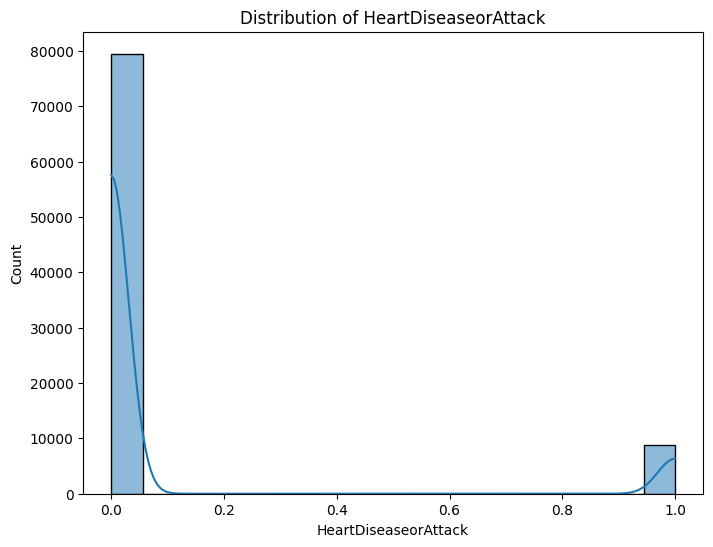

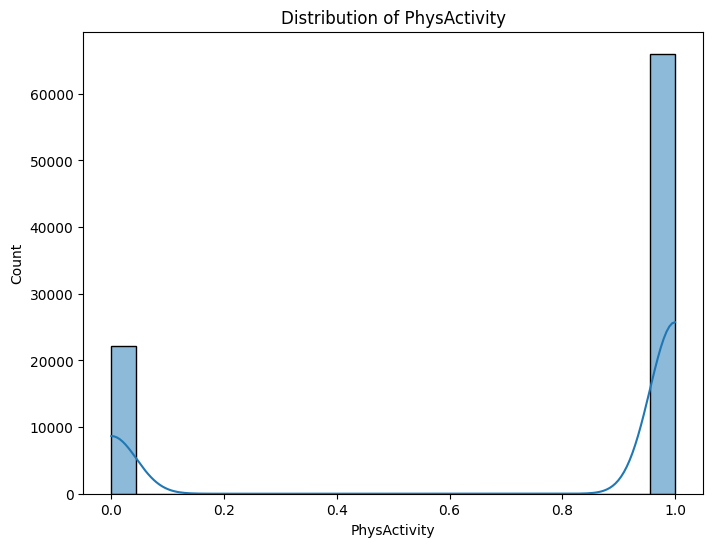

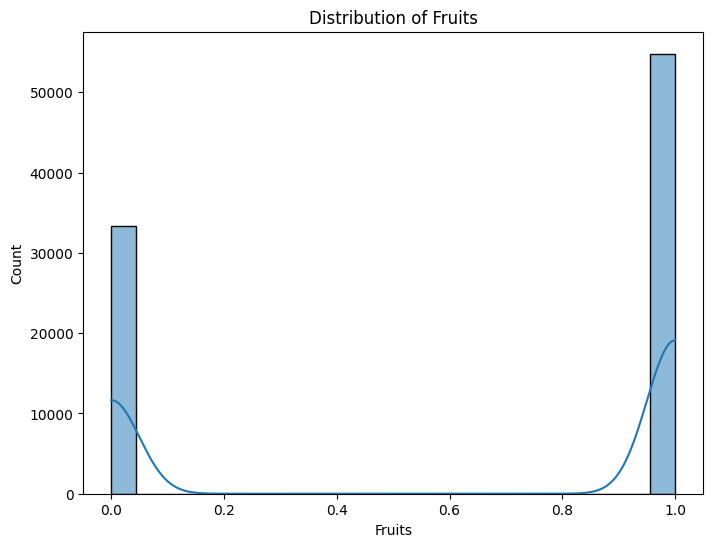

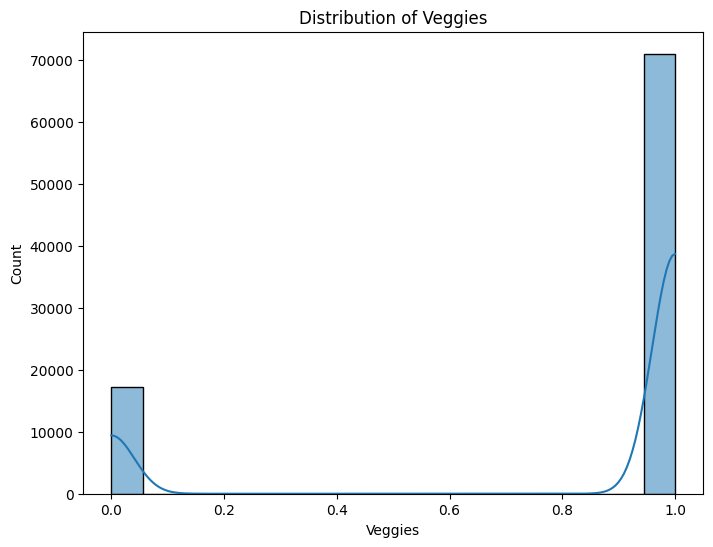

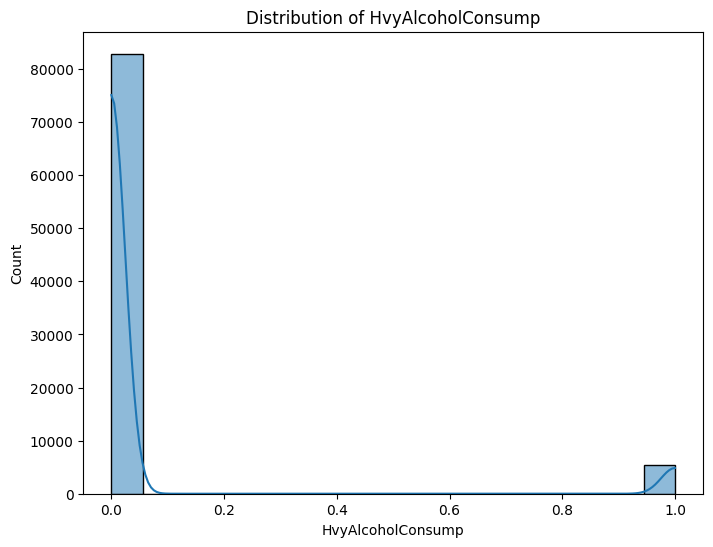

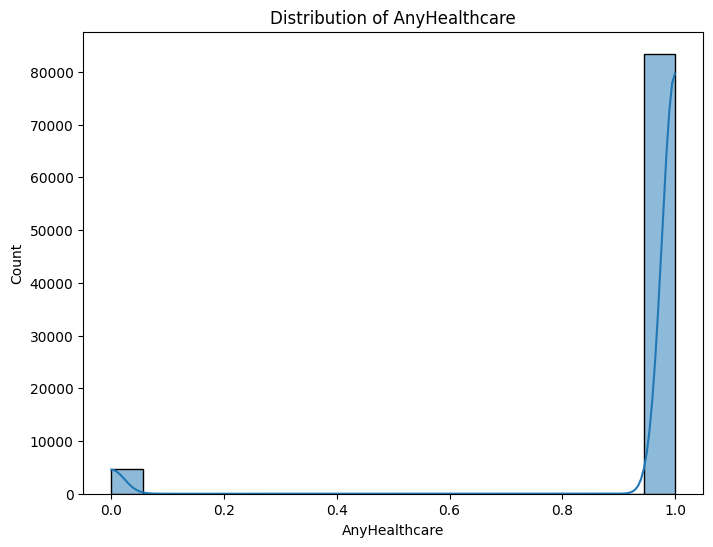

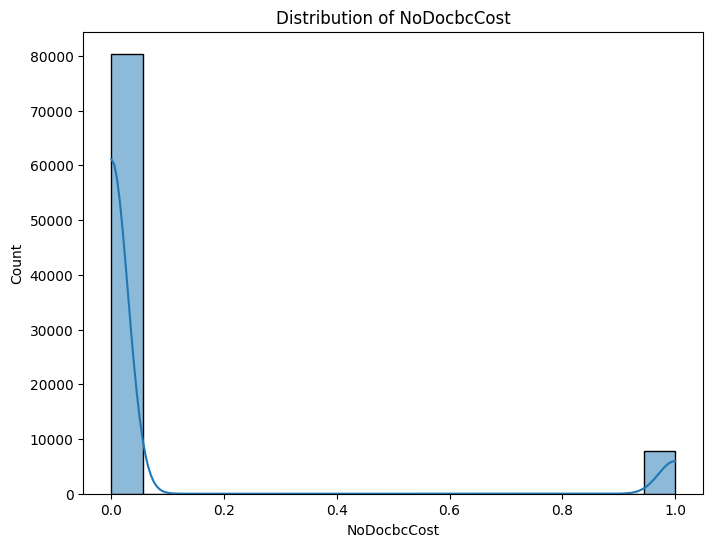

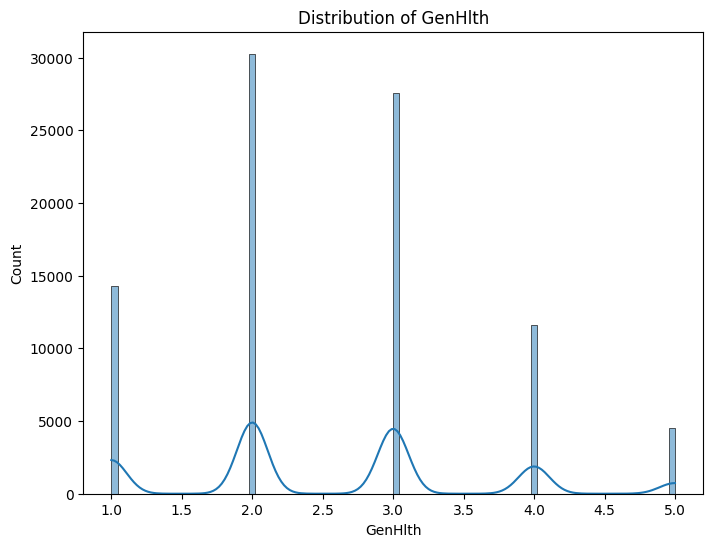

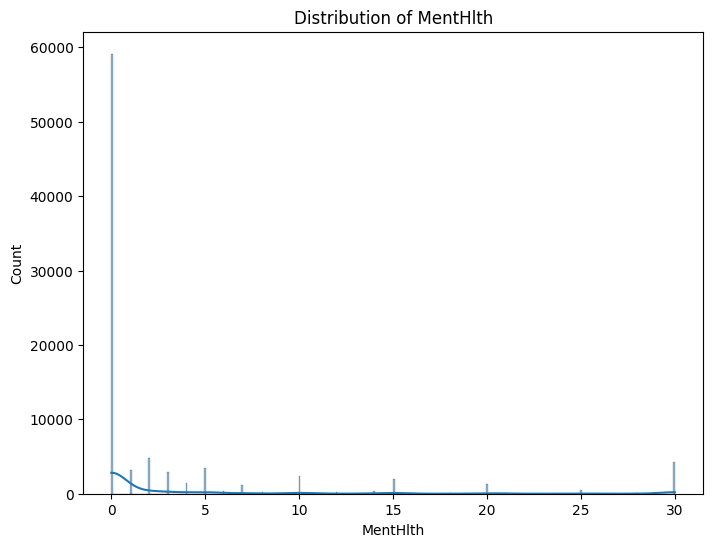

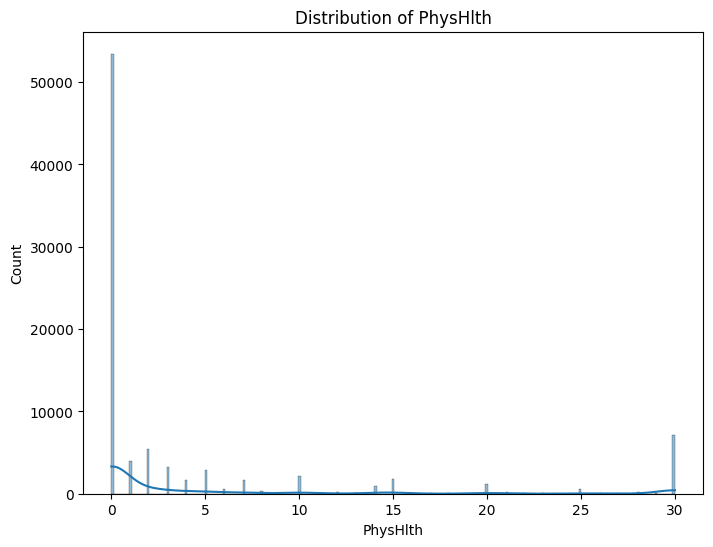

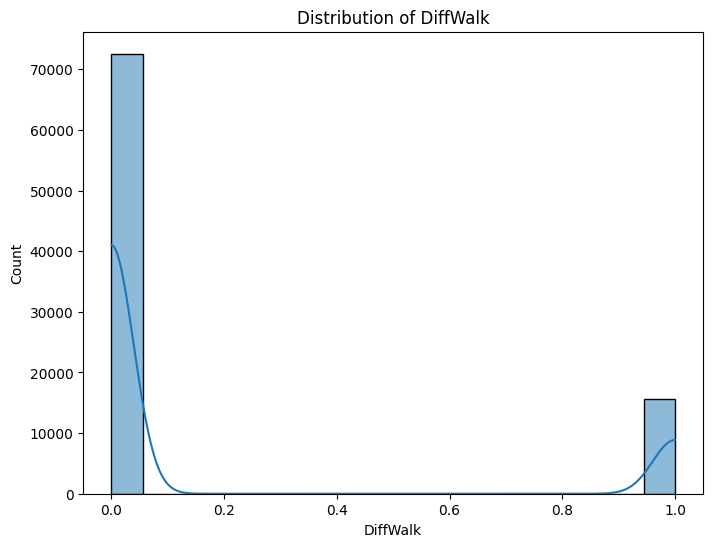

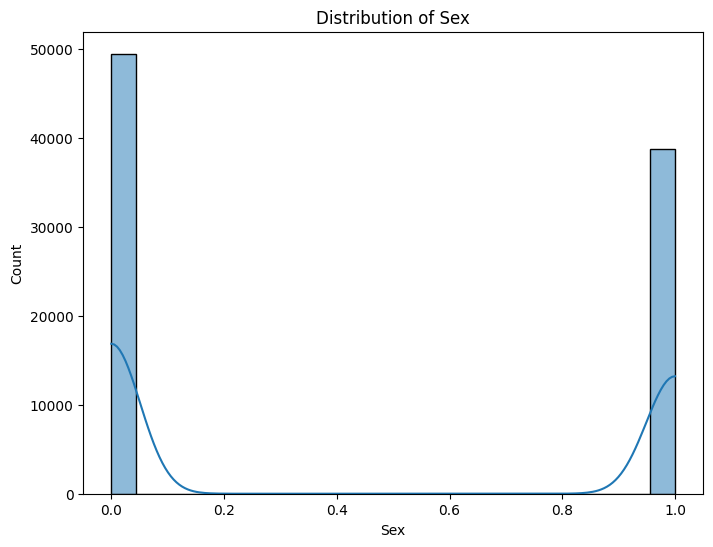

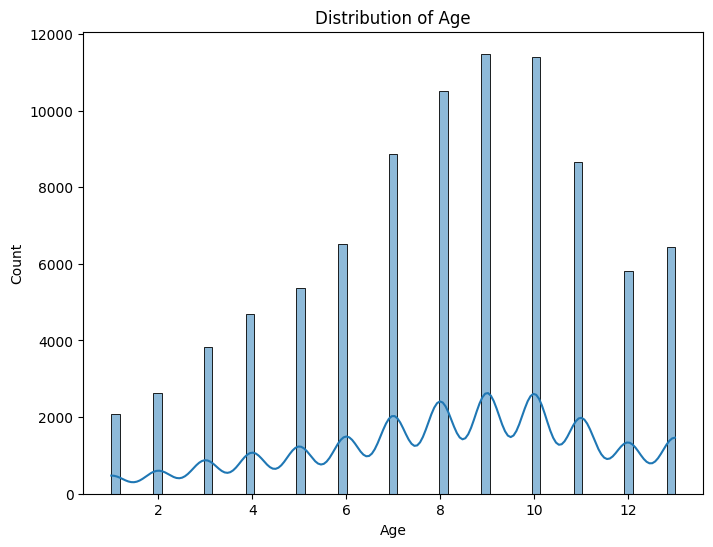

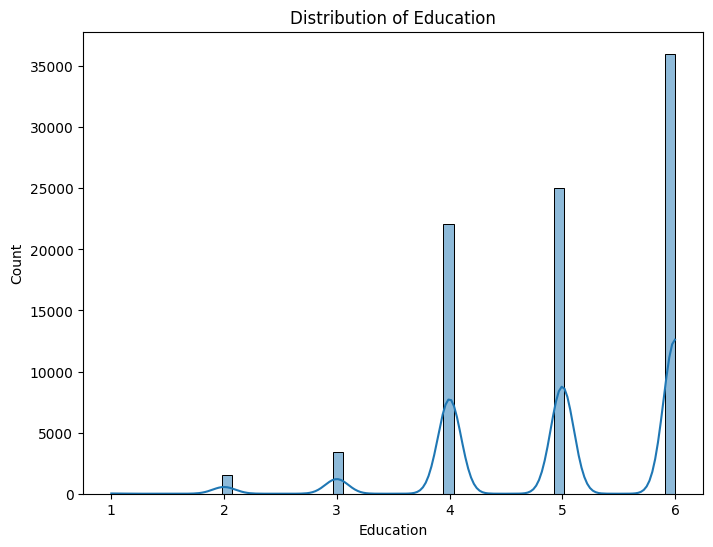

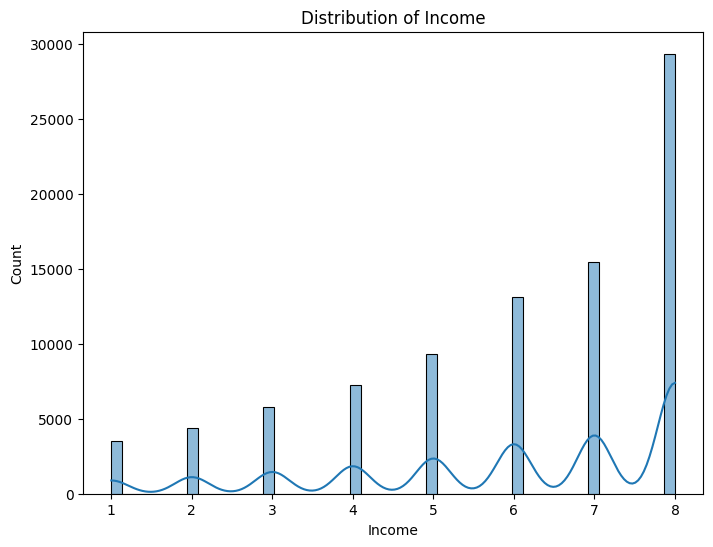

In [19]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

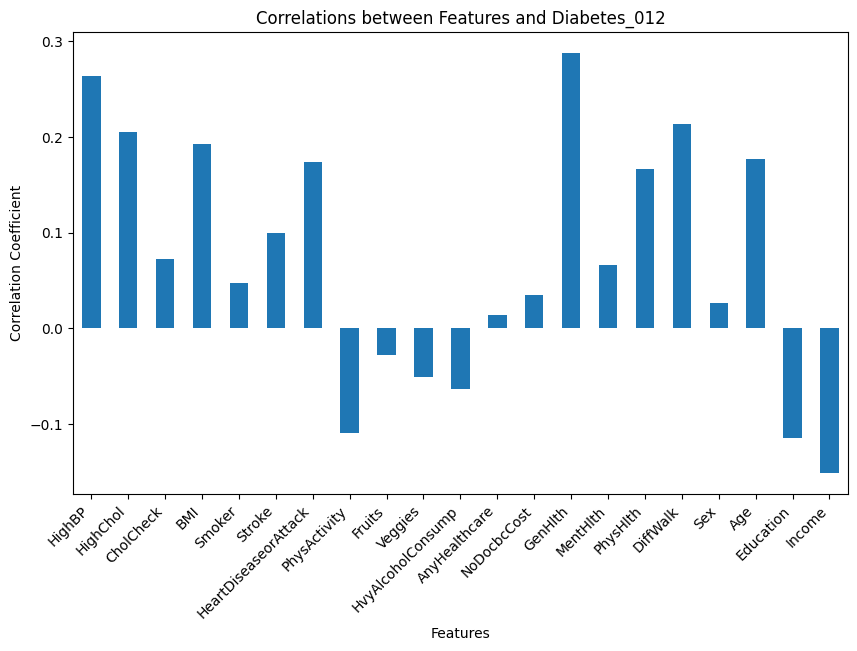

In [20]:
correlations = df.corr()['Diabetes_012'].drop('Diabetes_012')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlations between Features and Diabetes_012')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:02<00:00,  7.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
from imblearn.under_sampling import RandomUnderSampler
y.unique()


array([0., 1.])

In [23]:
rus = RandomUnderSampler(random_state=0)
X_under_sampled, y_undersampled = rus.fit_resample(x,y)



In [24]:
reasmpled_data=pd.concat([X_under_sampled,y_undersampled], axis=1)
reasmpled_data



HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
82047     1.0       0.0        1.0  16.0     0.0     0.0   
80927     0.0       0.0        NaN  35.0     1.0     0.0   
52079     0.0       0.0        1.0  19.0     0.0     0.0   
32366     1.0       1.0        1.0  31.0     1.0     0.0   
17288     0.0       0.0        1.0  23.0     0.0     0.0   
...       ...       ...        ...   ...     ...     ...   
93561     1.0       1.0        1.0  31.0     1.0     0.0   
93563     1.0       1.0        1.0  34.0     0.0     0.0   
93565     1.0       1.0        1.0  24.0     1.0     0.0   
93568     0.0       0.0        1.0  32.0     0.0     0.0   
93577     1.0       1.0        1.0  23.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
82047                   0.0           1.0     1.0      NaN  ...          0.0   
80927                   0.0           1.0     1.0      1.0  ...          0.0   
52079                   0.0           1.0     0.0      1.0  ...          NaN   
32366                   0.0           1.0     1.0      1.0  ...          NaN   
17288                   0.0           1.0     1.0      1.0  ...          0.0   
...                     ...           ...     ...      ...  ...          ...   
93561                   0.0           0.0     0.0      1.0  ...          0.0   
93563                   0.0           1.0     1.0      1.0  ...          0.0   
93565                   0.0           1.0     1.0      1.0  ...          0.0   
93568                   0.0           1.0     1.0      1.0  ...          0.0   
93577                   NaN           1.0     1.0      NaN  ...          0.0   

       GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
82047      3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0   
80927      3.0       0.0       0.0       0.0  0.0   9.0        5.0     2.0   
52079      1.0       2.0       0.0       0.0  0.0   5.0        6.0     4.0   
32366      3.0       NaN       0.0       0.0  0.0   3.0        5.0     2.0   
17288      1.0       1.0       0.0       0.0  0.0   2.0        6.0     8.0   
...        ...       ...       ...       ...  ...   ...        ...     ...   
93561      NaN       NaN       NaN       NaN  1.0  10.0        4.0     6.0   
93563      4.0       NaN       NaN       NaN  1.0   9.0        6.0     7.0   
93565      NaN       5.0       NaN       NaN  0.0   7.0        6.0     1.0   
93568      3.0       0.0       4.0       0.0  0.0  10.0        5.0     8.0   
93577      4.0       0.0       0.0       NaN  0.0  10.0        4.0     3.0   

       Diabetes_012  
82047           0.0  
80927           0.0  
52079           0.0  
32366           0.0  
17288           0.0  
...             ...  
93561           1.0  
93563           1.0  
93565           1.0  
93568           1.0  
93577           1.0  

[29544 rows x 22 columns]

In [25]:
reasmpled_data['Diabetes_012'].unique()

array([0., 1.])

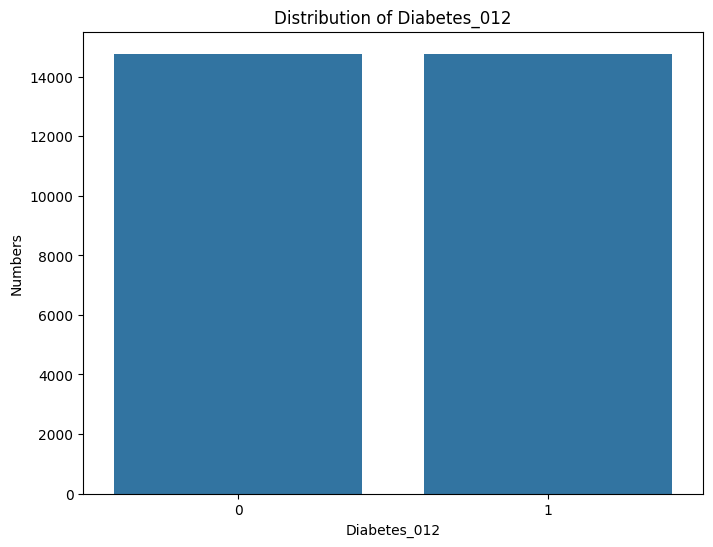

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=reasmpled_data)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Diabetes_012')
plt.ylabel('Numbers')
plt.title('Distribution of Diabetes_012')
plt.show()

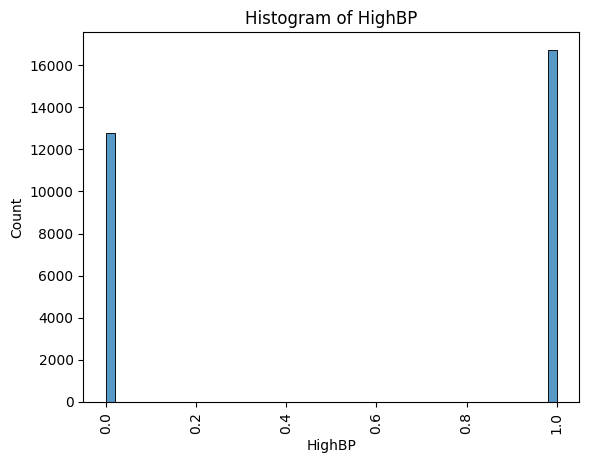

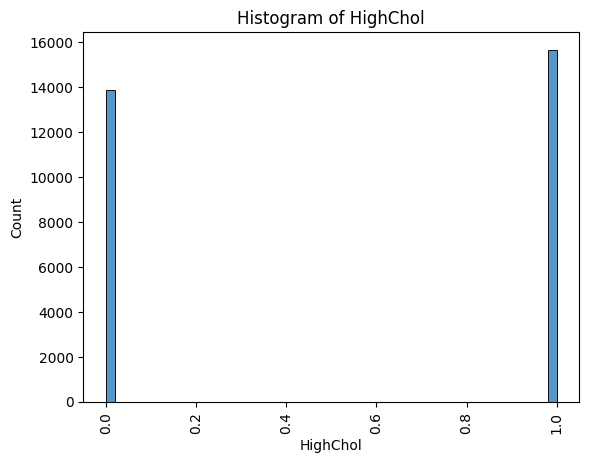

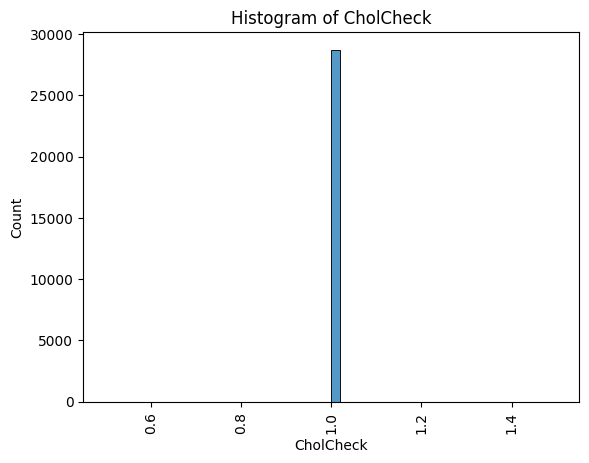

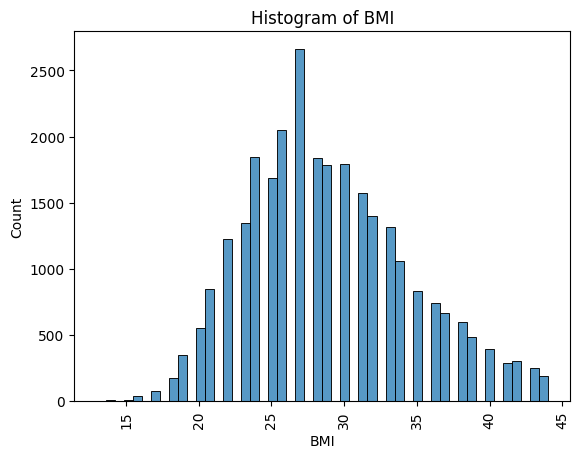

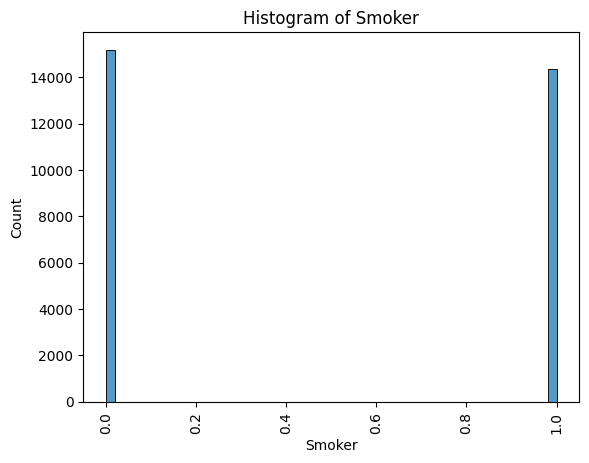

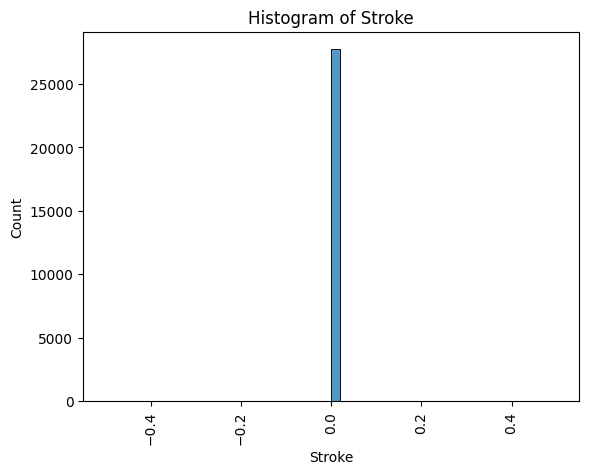

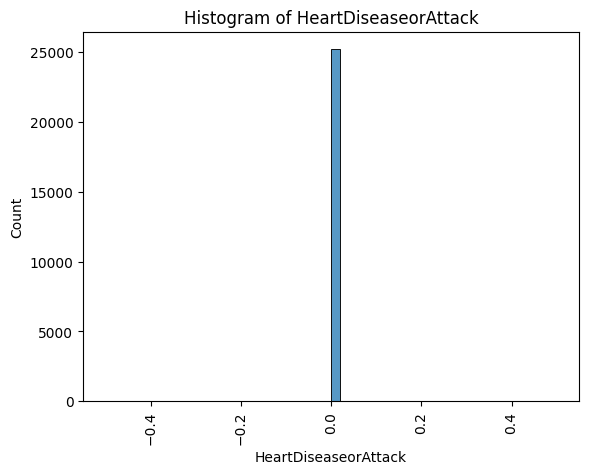

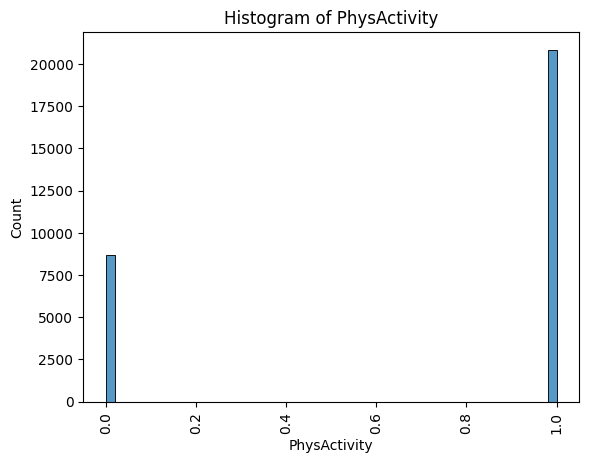

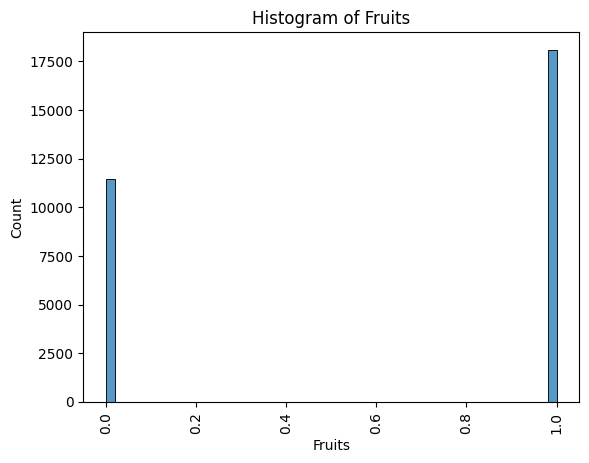

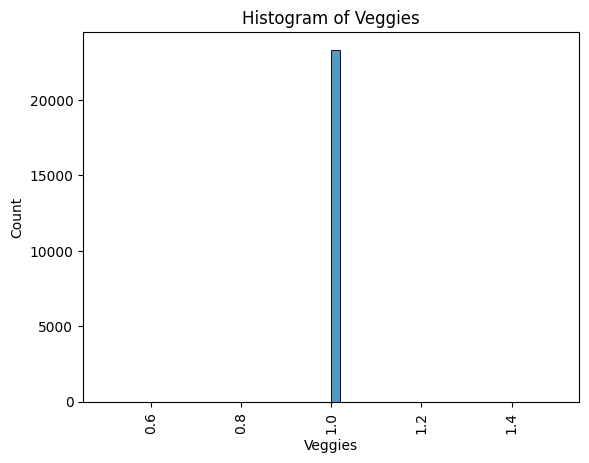

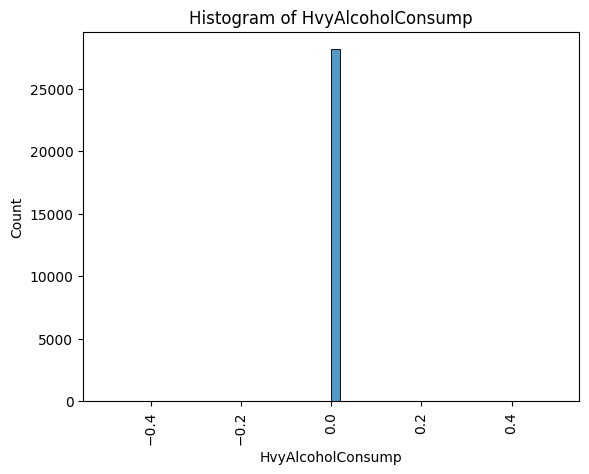

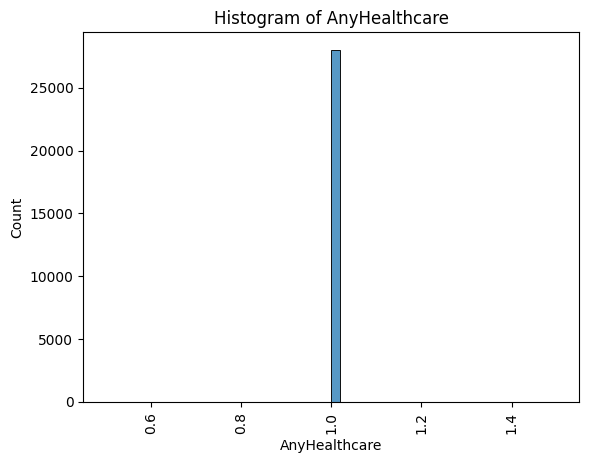

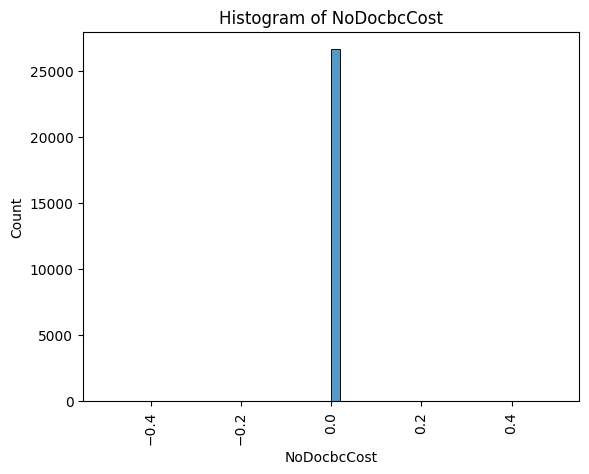

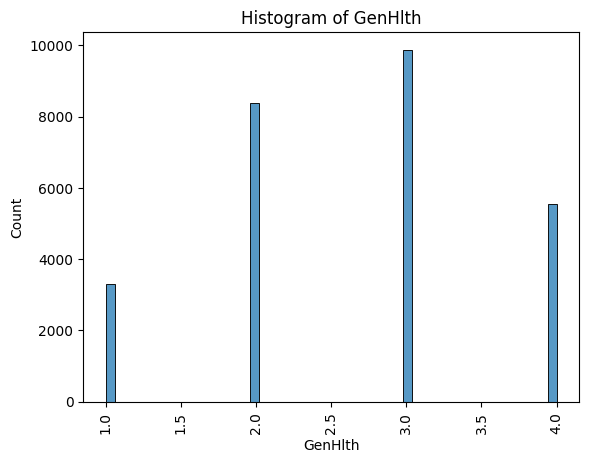

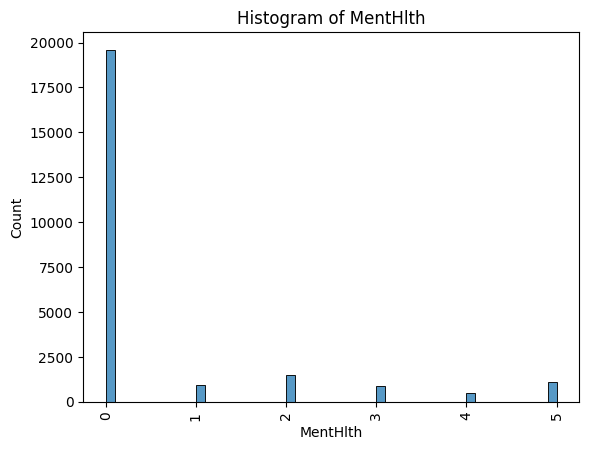

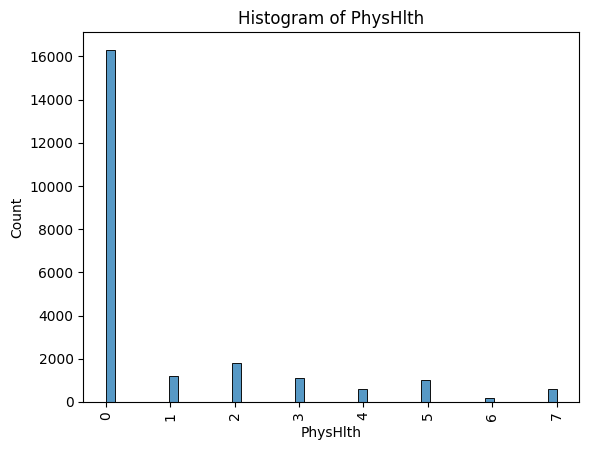

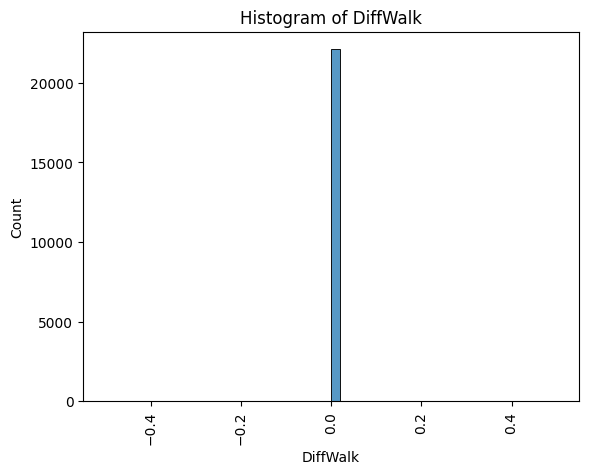

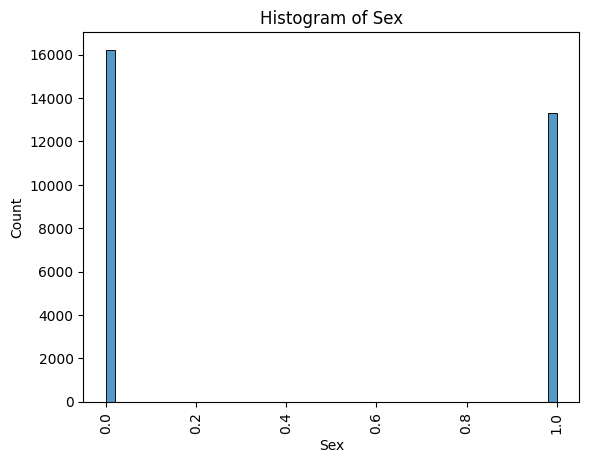

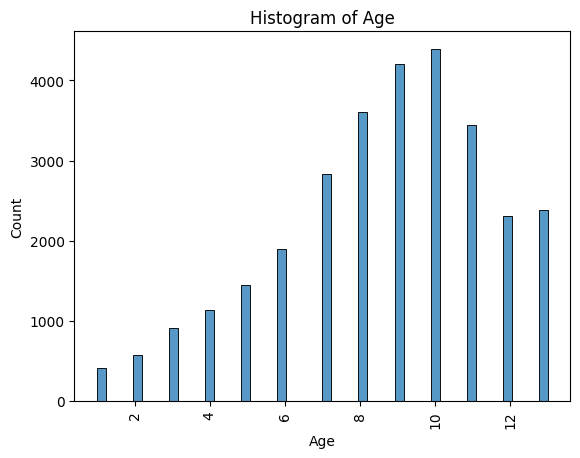

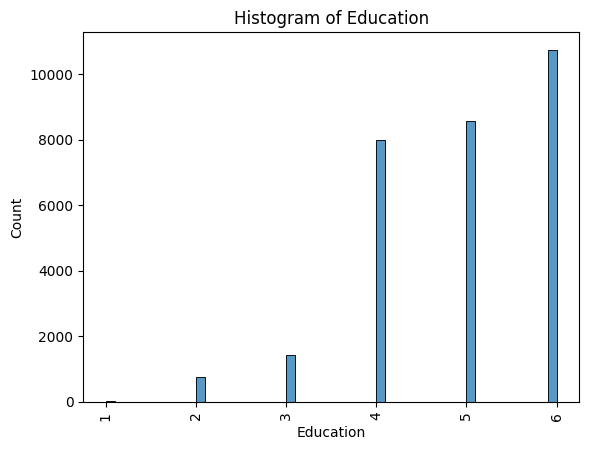

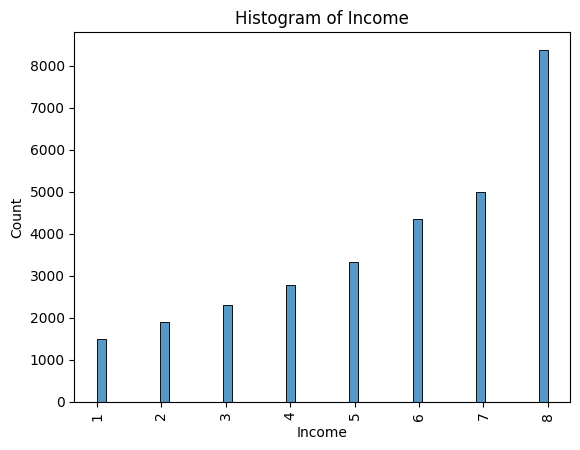

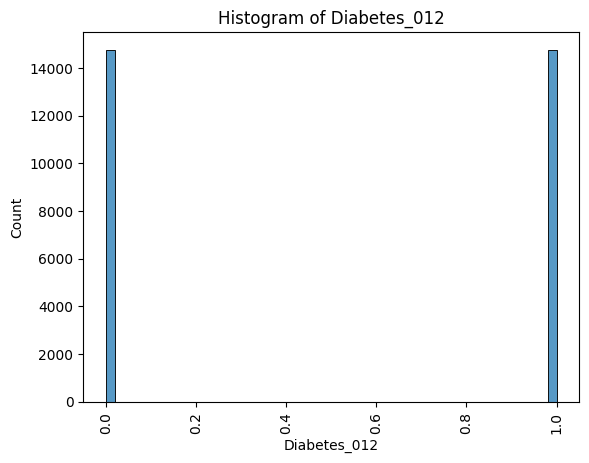

In [27]:
for col in reasmpled_data.columns:
    sns.histplot(reasmpled_data[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

#Features Selection

In [28]:
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold, chi2, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
feature_names = x.columns
# Standardize the features (required for some techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

* Information Gain (Mutual Information)


In [30]:

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

# Assuming 'x' is your DataFrame
# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Or choose another strategy
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Now use the imputed data for mutual_info_regression
mi_scores = mutual_info_regression(x_imputed, y)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)


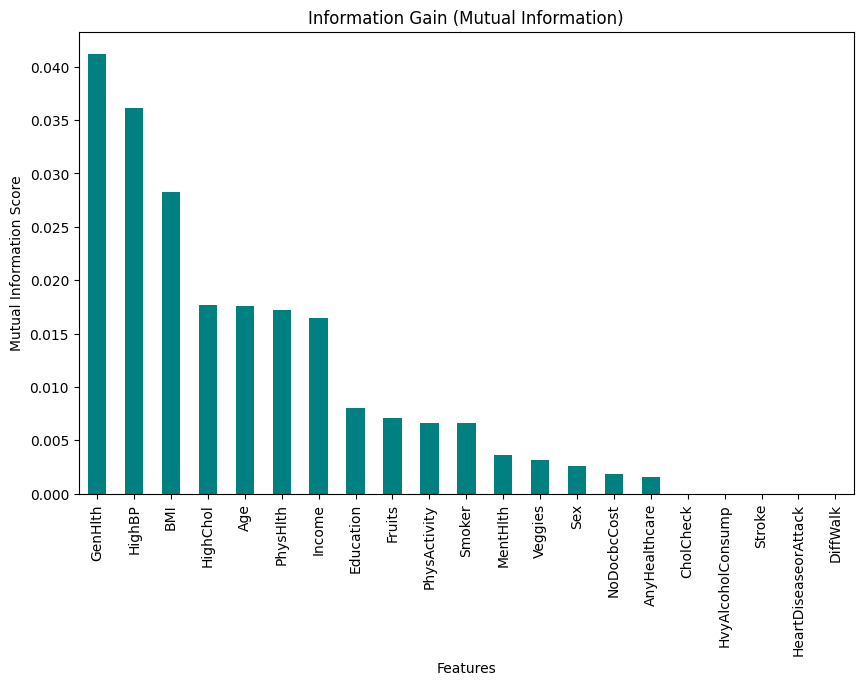

In [31]:
# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

The output represents the Mutual Information for each feature in a dataset with two features.


Higher Mutual Information values suggest a stronger relationship or dependency between the features and the target variable.

* Chi-square Test (For Classification Only)

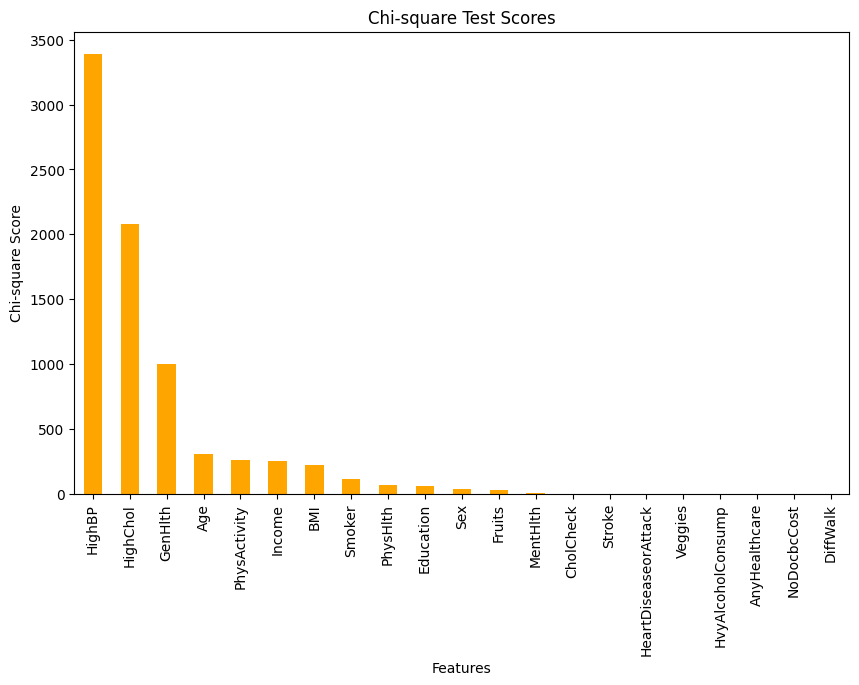

In [32]:
# Scale features to a non-negative range using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(x)

# Binarize the target variable for classification
y_bin = np.where(y > np.median(y), 1, 0)  # Convert to binary classification

X_non_negative = imputer.fit_transform(X_non_negative)


# Compute Chi-square scores
chi2_scores, _ = chi2(X_non_negative, y_bin)
chi2_scores = pd.Series(chi2_scores, index=feature_names)
chi2_scores.sort_values(ascending=False, inplace=True)

# Plot Chi-square Scores
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()

MedInc has a very high Chi-square score, meaning it has the strongest relationship with the target variable.

* Fisher’s Score (For Classification Only)


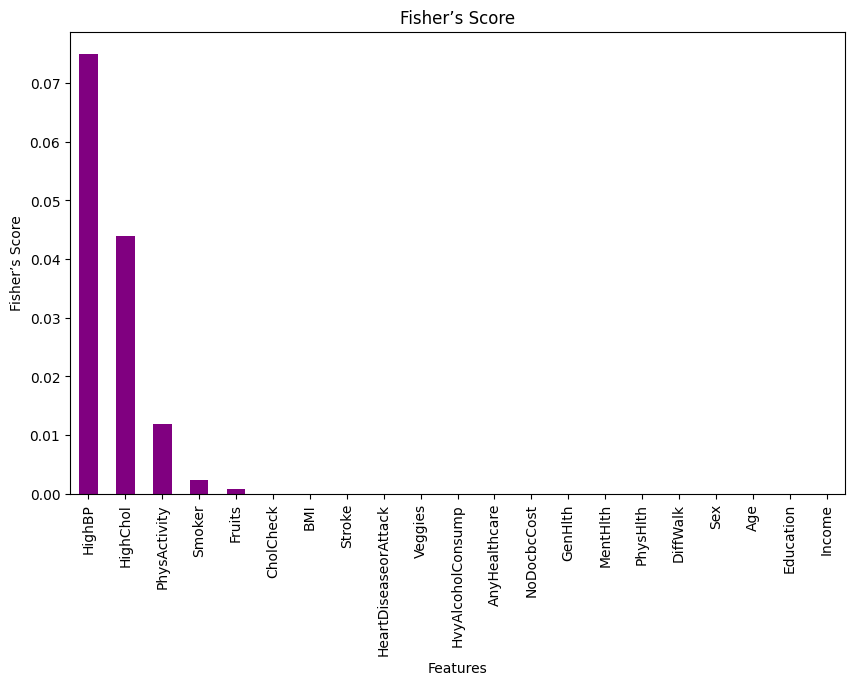

In [33]:
# Fisher’s Score is not directly available in scikit-learn, so we'll implement it manually.
def fisher_score(x, y):
    classes = np.unique(y)
    overall_mean = np.mean(x, axis=0)
    between_var = np.zeros(x.shape[1])
    within_var = np.zeros(x.shape[1])

    for c in classes:
        X_c = x[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

fisher_scores = fisher_score(X_scaled, y_bin)  # Using binarized target
fisher_scores = pd.Series(fisher_scores, index=feature_names)
fisher_scores.sort_values(ascending=False, inplace=True)

# Plot Fisher’s Scores
plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()

* Correlation Coefficient

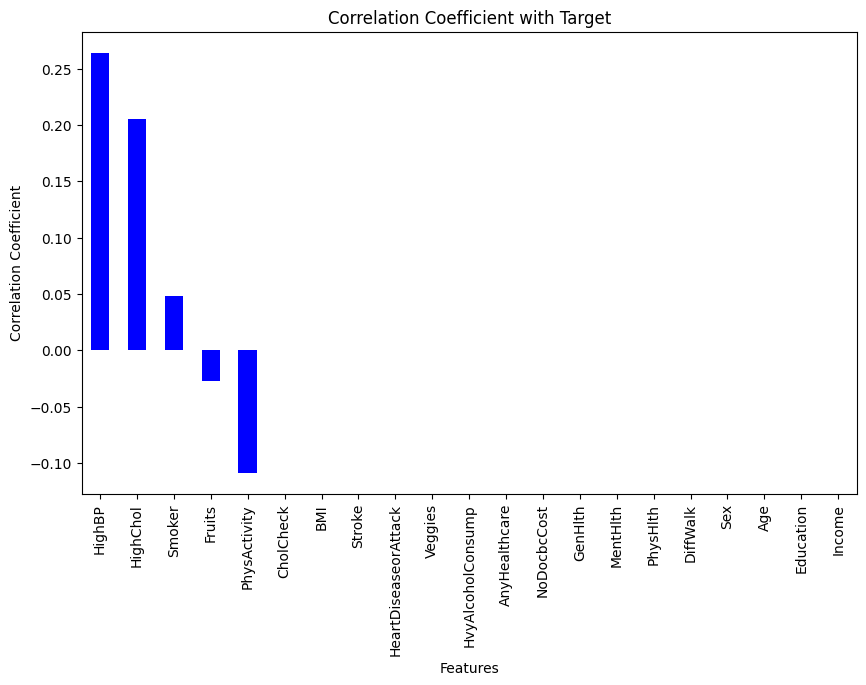

In [34]:
# Correlation Coefficient
corr_scores = np.corrcoef(x.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index=feature_names)
corr_scores.sort_values(ascending=False, inplace=True)

# Plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

* Variance Threshold


In [35]:
# Variance Threshold
variance_threshold = VarianceThreshold(threshold=0.1)  # Remove low-variance features
X_variance_selected = variance_threshold.fit_transform(x)

# Get selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [feature_names[i] for i in selected_features])

Selected Features (Variance Threshold): ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']


* ANOVA (F-test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6  9 10 11 12 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


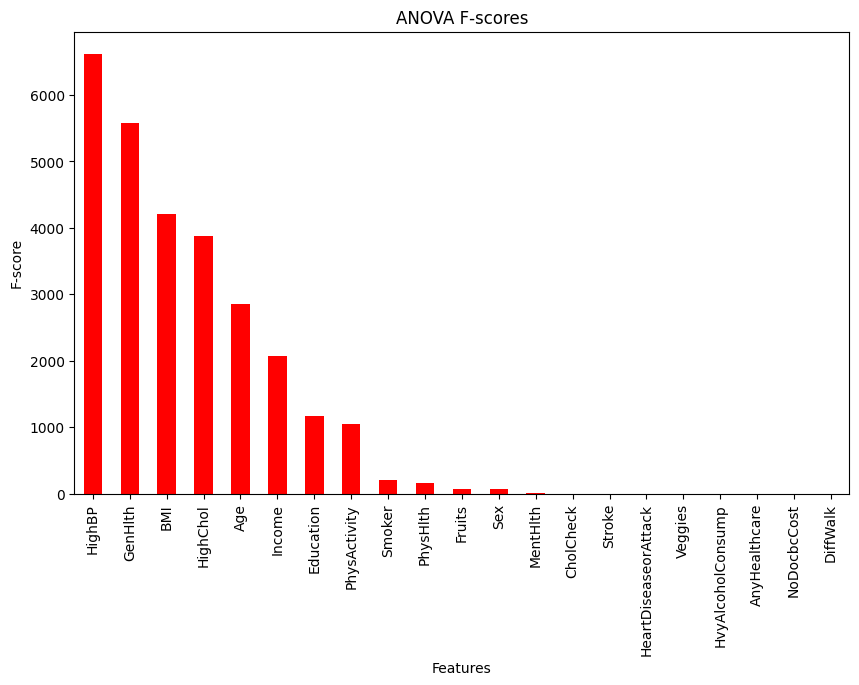

In [36]:
# ANOVA (F-test)
f_scores, _ = f_classif(x_imputed, y)  # ANOVA F-test
f_scores = pd.Series(f_scores, index=feature_names)
f_scores.sort_values(ascending=False, inplace=True)

# Plot ANOVA F-scores
plt.figure(figsize=(10, 6))
f_scores.plot(kind="bar", color="red")
plt.title("ANOVA F-scores")
plt.xlabel("Features")
plt.ylabel("F-score")
plt.show()

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=10)
selector = selector.fit(x_imputed, y)



In [38]:
selected_features = x.columns[selector.support_]
print("Top Features Selected by RFE:")
print(selected_features)


Top Features Selected by RFE:
Index(['HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'Veggies',
       'AnyHealthcare', 'GenHlth', 'Sex', 'Age', 'Income'],
      dtype='object')


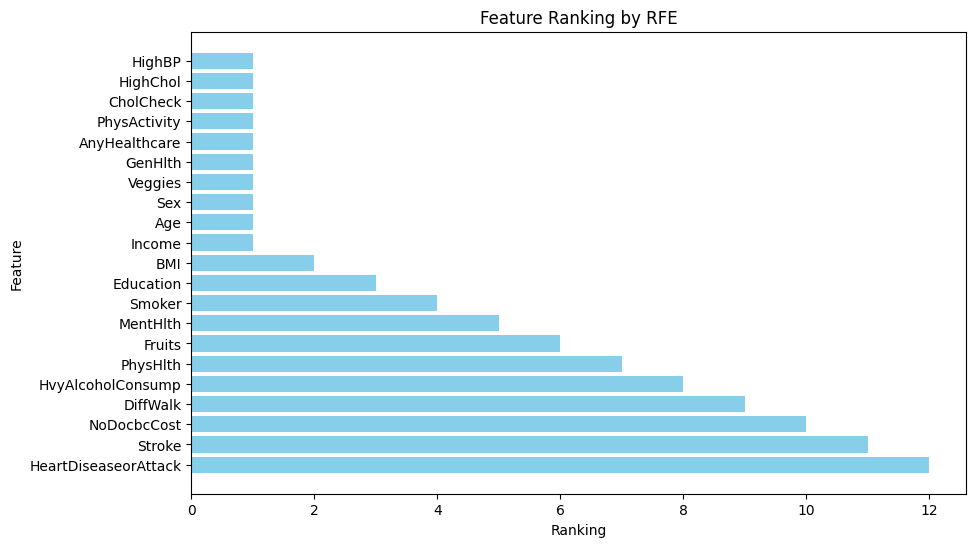

In [39]:
# Get the ranking of features from RFE
feature_ranking = selector.ranking_
feature_names = x.columns

# Create a DataFrame for better visualization
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values('Ranking')

# Plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'], color='skyblue')
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.title("Feature Ranking by RFE")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# Decision **Tree**

In [40]:
target_column = 'Diabetes_012'

In [41]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
# Cell 9: Apply SMOTE to handle class imbalance (only on training data)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

dt.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [46]:
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)


In [47]:
from sklearn.metrics import accuracy_score, precision_score
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Cell 14: Print results
print("\n--- Decision Tree Performance ---")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Training Precision: {train_precision:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print(f"Testing Precision: {test_precision:.3f}")



--- Decision Tree Performance ---
Training Accuracy: 0.996
Training Precision: 1.000
Testing Accuracy: 0.760
Testing Precision: 0.307


Learning Curve

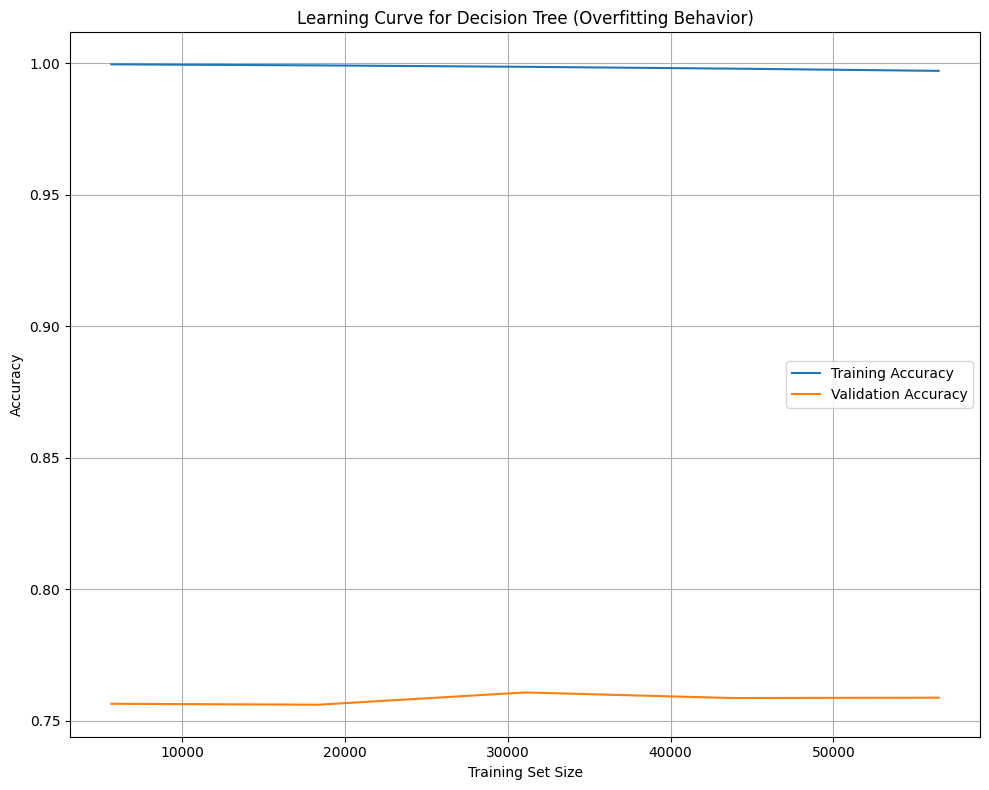

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Decision Tree (no depth limit to illustrate overfitting)
tree_clf = DecisionTreeClassifier(random_state=42)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree_clf,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Compute average scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")

plt.title("Learning Curve for Decision Tree (Overfitting Behavior)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


Validation Curve

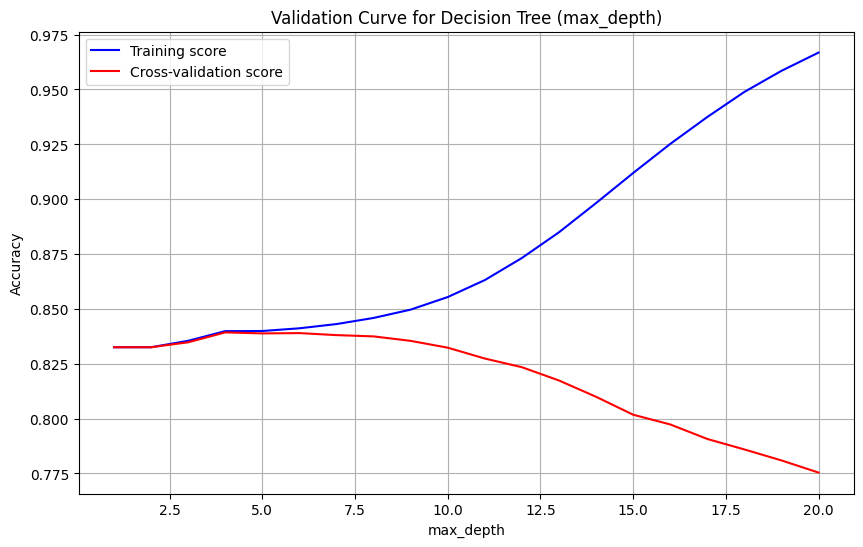

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot validation curves
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=5, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring=scoring
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label="Training score", color="blue")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Decision Tree Classifier and parameter tuning
tree = DecisionTreeClassifier(random_state=42)
param_range = np.arange(1, 21)  # Trying max_depth values from 1 to 20

plot_validation_curve(tree, "Validation Curve for Decision Tree (max_depth)", X_train, y_train, "max_depth", param_range)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
feature_names = pd.get_dummies(df.drop(columns=['Diabetes_012'], axis=1)).columns
plot_tree(dt, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [51]:
from sklearn.metrics import classification_report
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85     14697
         1.0       0.31      0.35      0.32      2949

    accuracy                           0.76     17646
   macro avg       0.59      0.59      0.59     17646
weighted avg       0.77      0.76      0.77     17646



<Figure size 640x480 with 0 Axes>

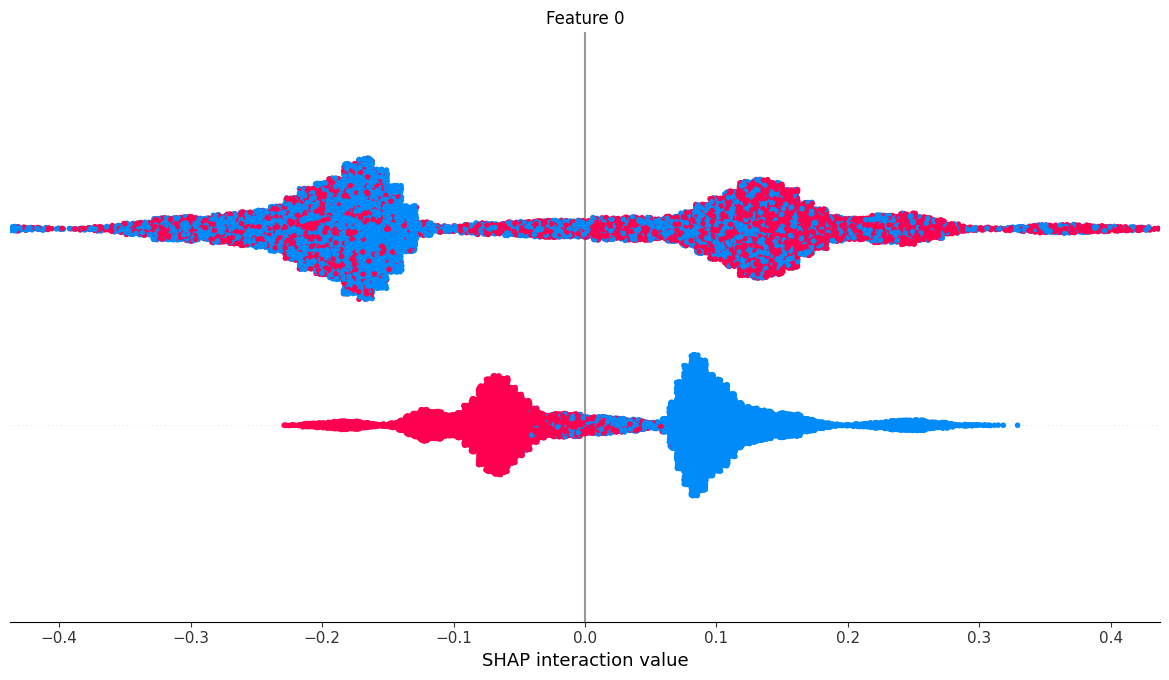

In [53]:
import shap

explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test_scaled)

# Visualize SHAP values

shap.summary_plot(shap_values, X_test_scaled)



In [55]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7b4930f3caccef563ecde764c2fb381dec5b120e7f81c469cefa5a6a844f0e28
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [56]:

import lime
import lime.lime_tabular


# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X_train.columns,  # Feature names
    class_names=['0', '1'],  # Class names
    discretize_continuous=True
)

# Choose an instance from the test set to explain
instance_to_explain = X_test_scaled[0]

# Get the explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=dt.predict_proba,
    num_features=10
)

# Show the explanation
explanation.show_in_notebook(show_table=True)

